<a href="https://colab.research.google.com/github/Leonel58/MACHINE_LEARNING_PYTHON/blob/master/analisis_deteccion_anomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy
import pandas as pd

In [9]:
import pandas as pd

# Intenta leer el log como CSV con diferentes separadores
try:
    # Opción A: Separado por espacios/tabs (más probable para logs)
    proxi = pd.read_csv("/content/Proxifier_2k.log",
                       sep=r'\s+',  # regex para uno o más espacios
                       engine='python',
                       header=None)  # Sin encabezados

    # Opción B: Si el log tiene formato fijo con corchetes
    proxi = pd.read_csv("/content/Proxifier_2k.log",
                       sep=r'\s+-\s+|\s{2,}',  # separador más complejo
                       engine='python',
                       header=None)

except Exception as e:
    print(f"Error: {e}")
    # Opción C: Leer línea por línea y parsear manualmente
    with open("/content/Proxifier_2k.log", 'r') as f:
        lines = f.readlines()
    print(f"Primeras 3 líneas del archivo:\n")
    for i in range(min(3, len(lines))):
        print(f"Línea {i+1}: {lines[i]}")

Error: Expected 10 fields in line 4, saw 14. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Primeras 3 líneas del archivo:

Línea 1: [10.30 16:49:06] chrome.exe - proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS

Línea 2: [10.30 16:49:06] chrome.exe - proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS

Línea 3: [10.30 16:49:06] chrome.exe - proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS



In [10]:
import pandas as pd
import re

# Lee todo el archivo
with open("/content/Proxifier_2k.log", 'r') as f:
    lines = f.readlines()

# Procesa cada línea
records = []
for line in lines:
    line = line.strip()
    if not line:
        continue

    # Extrae timestamp entre corchetes
    timestamp_match = re.search(r'\[(.*?)\]', line)
    timestamp = timestamp_match.group(1) if timestamp_match else None

    # Remueve el timestamp de la línea para facilitar parsing
    if timestamp_match:
        line_without_time = line[timestamp_match.end():].strip()
    else:
        line_without_time = line

    # Divide el resto
    parts = line_without_time.split(' - ')
    if len(parts) >= 2:
        process = parts[0].strip()

        # El resto puede tener diferente estructura
        rest = ' - '.join(parts[1:])

        # Intenta extraer información adicional
        # Busca "open through proxy"
        if 'open through proxy' in rest:
            before_open = rest.split('open through proxy')[0].strip()
            after_open = rest.split('open through proxy')[1].strip()

            # Separa destino, proxy y protocolo
            after_parts = after_open.split()
            if len(after_parts) >= 2:
                proxy = after_parts[0]
                protocol = after_parts[1] if len(after_parts) > 1 else None
            else:
                proxy = after_open
                protocol = None
        else:
            before_open = rest
            proxy = None
            protocol = None

        records.append({
            'timestamp': timestamp,
            'process': process,
            'destination': before_open,
            'proxy_used': proxy,
            'protocol': protocol,
            'raw_line': line  # Mantener original por si acaso
        })

# Crea DataFrame
proxi = pd.DataFrame(records)

print("Vista previa del DataFrame:")
print(proxi.head())
print(f"\nColumnas: {proxi.columns.tolist()}")

Vista previa del DataFrame:
        timestamp     process  \
0  10.30 16:49:06  chrome.exe   
1  10.30 16:49:06  chrome.exe   
2  10.30 16:49:06  chrome.exe   
3  10.30 16:49:07  chrome.exe   
4  10.30 16:49:07  chrome.exe   

                                         destination  \
0                         proxy.cse.cuhk.edu.hk:5070   
1                         proxy.cse.cuhk.edu.hk:5070   
2                         proxy.cse.cuhk.edu.hk:5070   
3  proxy.cse.cuhk.edu.hk:5070 close, 0 bytes sent...   
4                         proxy.cse.cuhk.edu.hk:5070   

                   proxy_used protocol  \
0  proxy.cse.cuhk.edu.hk:5070    HTTPS   
1  proxy.cse.cuhk.edu.hk:5070    HTTPS   
2  proxy.cse.cuhk.edu.hk:5070    HTTPS   
3                        None     None   
4  proxy.cse.cuhk.edu.hk:5070    HTTPS   

                                            raw_line  
0  [10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...  
1  [10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...  
2  [10.30 16:49:06

In [13]:
proxi.head(40)

,timestamp,process,destination,proxy_used,protocol,raw_line
0,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...
1,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...
2,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...
3,10.30 16:49:07,chrome.exe,"proxy.cse.cuhk.edu.hk:5070 close, 0 bytes sent...",None,None,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...
4,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...
5,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...
6,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...
7,10.30 16:49:07,chrome.exe,"proxy.cse.cuhk.edu.hk:5070 close, 403 bytes se...",None,None,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...
8,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...
9,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...


In [14]:
# PRIMERO: Veamos el formato real de tu archivo
with open("/content/Proxifier_2k.log", 'r') as f:
    first_lines = [next(f).strip() for _ in range(5)]

print("FORMATO DE TU ARCHIVO:")
print("=" * 50)
for i, line in enumerate(first_lines):
    print(f"Línea {i+1}: {line}")
    print(f"Longitud: {len(line)} caracteres")
    print(f"Partes por split('- '): {line.split(' - ')}")
    print("-" * 30)

# Ejecuta esto primero y dime qué imprime
# Luego puedo darte el código exacto para parsearlo

FORMATO DE TU ARCHIVO:
Línea 1: [10.30 16:49:06] chrome.exe - proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS
Longitud: 108 caracteres
Partes por split('- '): ['[10.30 16:49:06] chrome.exe', 'proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS']
------------------------------
Línea 2: [10.30 16:49:06] chrome.exe - proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS
Longitud: 108 caracteres
Partes por split('- '): ['[10.30 16:49:06] chrome.exe', 'proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS']
------------------------------
Línea 3: [10.30 16:49:06] chrome.exe - proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS
Longitud: 108 caracteres
Partes por split('- '): ['[10.30 16:49:06] chrome.exe', 'proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS']
------------------------------
Línea 4: [10.30 16:49:07] chrome.exe - pr

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuración visual
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Cargar los datos (ajusta según cómo hayas parseado tu archivo)
# Asumiendo que 'proxi' es tu DataFrame ya cargado
# Si no, usa el parser adecuado del código anterior

# Verificar estructura
print("Estructura del DataFrame:")
print(proxi.head())
print(f"\nColumnas disponibles: {proxi.columns.tolist()}")

Estructura del DataFrame:
        timestamp     process  \
0  10.30 16:49:06  chrome.exe   
1  10.30 16:49:06  chrome.exe   
2  10.30 16:49:06  chrome.exe   
3  10.30 16:49:07  chrome.exe   
4  10.30 16:49:07  chrome.exe   

                                         destination  \
0                         proxy.cse.cuhk.edu.hk:5070   
1                         proxy.cse.cuhk.edu.hk:5070   
2                         proxy.cse.cuhk.edu.hk:5070   
3  proxy.cse.cuhk.edu.hk:5070 close, 0 bytes sent...   
4                         proxy.cse.cuhk.edu.hk:5070   

                   proxy_used protocol  \
0  proxy.cse.cuhk.edu.hk:5070    HTTPS   
1  proxy.cse.cuhk.edu.hk:5070    HTTPS   
2  proxy.cse.cuhk.edu.hk:5070    HTTPS   
3                        None     None   
4  proxy.cse.cuhk.edu.hk:5070    HTTPS   

                                            raw_line  
0  [10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...  
1  [10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...  
2  [10.30 16:49:06] 

In [16]:
# Si el timestamp está en formato '10.30 16:49:06'
def extract_hour(timestamp_str):
    """Extrae la hora de un timestamp en formato 'MM.DD HH:MM:SS'"""
    try:
        # Buscar el patrón de hora (HH:MM:SS)
        if isinstance(timestamp_str, str) and ':' in timestamp_str:
            # Encuentra la parte de la hora
            time_part = timestamp_str.split()[-1]  # Toma '16:49:06'
            hour = int(time_part.split(':')[0])  # Toma '16'
            return hour
        return None
    except:
        return None

# Aplicar la función a la columna de timestamp
if 'timestamp' in proxi.columns:
    proxi['hora'] = proxi['timestamp'].apply(extract_hour)

    # Filtrar valores nulos
    proxi_clean = proxi.dropna(subset=['hora'])
    print(f"Datos con hora válida: {len(proxi_clean)} de {len(proxi)}")
else:
    print("ERROR: No hay columna 'timestamp' en el DataFrame")
    # Ver qué columnas sí hay
    print("Columnas disponibles:", proxi.columns.tolist())

Datos con hora válida: 2000 de 2000


In [17]:
proxi.head(20)

,timestamp,process,destination,proxy_used,protocol,raw_line,hora
0,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16
1,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16
2,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16
3,10.30 16:49:07,chrome.exe,"proxy.cse.cuhk.edu.hk:5070 close, 0 bytes sent...",None,None,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16
4,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16
5,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16
6,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16
7,10.30 16:49:07,chrome.exe,"proxy.cse.cuhk.edu.hk:5070 close, 403 bytes se...",None,None,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16
8,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16
9,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16


In [18]:
# 1. Distribución por hora
if 'hora' in proxi_clean.columns:
    # Conteo de conexiones por hora
    conexiones_por_hora = proxi_clean['hora'].value_counts().sort_index()

    print("=" * 50)
    print("ANÁLISIS DE HORAS PICO DE NAVEGACIÓN")
    print("=" * 50)

    # Mostrar tabla ordenada
    print("\n📊 CONEXIONES POR HORA DEL DÍA:")
    print("-" * 30)
    for hora, count in conexiones_por_hora.items():
        hora_str = f"{int(hora):02d}:00-{int(hora):02d}:59"
        print(f"{hora_str}: {count:4d} conexiones")

    # Identificar picos
    hora_pico = conexiones_por_hora.idxmax()
    max_conexiones = conexiones_por_hora.max()

    print(f"\n⏰ HORA PICO ABSOLUTA: {int(hora_pico):02d}:00")
    print(f"   • {max_conexiones} conexiones en esa hora")
    print(f"   • Representa el {max_conexiones/len(proxi_clean)*100:.1f}% del total")

    # Top 3 horas pico
    top_3 = conexiones_por_hora.nlargest(3)
    print(f"\n🏆 TOP 3 HORAS CON MÁS ACTIVIDAD:")
    for i, (hora, count) in enumerate(top_3.items(), 1):
        print(f"   {i}. {int(hora):02d}:00 - {count} conexiones")

    # Promedio de conexiones por hora
    promedio = conexiones_por_hora.mean()
    print(f"\n📈 PROMEDIO: {promedio:.1f} conexiones por hora")

    # Identificar horas con actividad significativa (> promedio)
    horas_activas = conexiones_por_hora[conexiones_por_hora > promedio]
    print(f"\n🌅 HORAS ACTIVAS (sobre promedio):")
    horas_str = ', '.join([f"{int(h):02d}:00" for h in horas_activas.index])
    print(f"   {horas_str}")

    # Rango horario laboral vs no laboral (asumiendo 9-17)
    rango_laboral = range(9, 18)  # 9:00 a 17:59
    conexiones_laborales = proxi_clean[proxi_clean['hora'].isin(rango_laboral)]
    conexiones_no_laborales = proxi_clean[~proxi_clean['hora'].isin(rango_laboral)]

    print(f"\n👔 ACTIVIDAD LABORAL (9:00-17:59):")
    print(f"   • {len(conexiones_laborales)} conexiones ({len(conexiones_laborales)/len(proxi_clean)*100:.1f}%)")
    print(f"\n🏠 ACTIVIDAD NO LABORAL:")
    print(f"   • {len(conexiones_no_laborales)} conexiones ({len(conexiones_no_laborales)/len(proxi_clean)*100:.1f}%)")

ANÁLISIS DE HORAS PICO DE NAVEGACIÓN

📊 CONEXIONES POR HORA DEL DÍA:
------------------------------
03:00-03:59:   27 conexiones
04:00-04:59:   16 conexiones
05:00-05:59:   50 conexiones
06:00-06:59:   10 conexiones
07:00-07:59:   25 conexiones
08:00-08:59:   17 conexiones
09:00-09:59:   57 conexiones
10:00-10:59:   54 conexiones
13:00-13:59:   97 conexiones
14:00-14:59:  133 conexiones
15:00-15:59:  143 conexiones
16:00-16:59:  300 conexiones
17:00-17:59:  358 conexiones
18:00-18:59:  109 conexiones
19:00-19:59:   55 conexiones
20:00-20:59:  363 conexiones
21:00-21:59:  169 conexiones
22:00-22:59:   17 conexiones

⏰ HORA PICO ABSOLUTA: 20:00
   • 363 conexiones en esa hora
   • Representa el 18.1% del total

🏆 TOP 3 HORAS CON MÁS ACTIVIDAD:
   1. 20:00 - 363 conexiones
   2. 17:00 - 358 conexiones
   3. 16:00 - 300 conexiones

📈 PROMEDIO: 111.1 conexiones por hora

🌅 HORAS ACTIVAS (sobre promedio):
   14:00, 15:00, 16:00, 17:00, 20:00, 21:00

👔 ACTIVIDAD LABORAL (9:00-17:59):
   • 114

/tmp/ipython-input-1072330494.py:41: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  proxi_clean['hora_completa'] = proxi_clean['fecha_hora'].dt.floor('H')
/tmp/ipython-input-1072330494.py:72: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1072330494.py:72: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


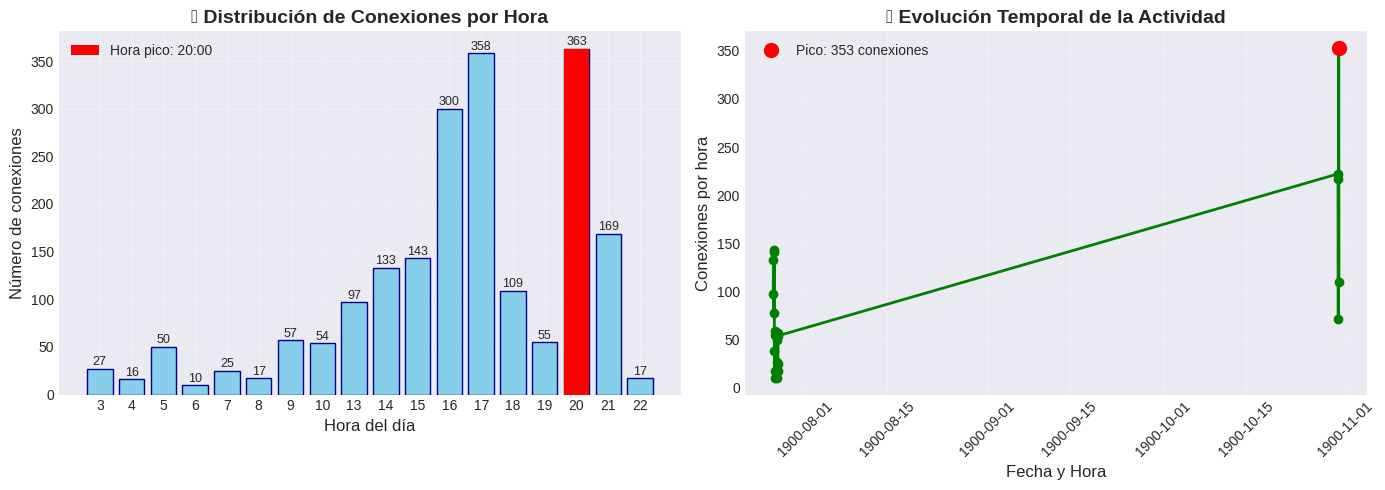

In [19]:
# 2. Gráfico de distribución
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
ax1 = axes[0]
bars = ax1.bar(conexiones_por_hora.index.astype(str),
               conexiones_por_hora.values,
               color='skyblue',
               edgecolor='darkblue')

# Resaltar hora pico
hora_pico_idx = conexiones_por_hora.idxmax()
ax1.bar(str(hora_pico_idx),
        conexiones_por_hora.loc[hora_pico_idx],
        color='red',
        label=f'Hora pico: {int(hora_pico_idx):02d}:00')

ax1.set_xlabel('Hora del día', fontsize=12)
ax1.set_ylabel('Número de conexiones', fontsize=12)
ax1.set_title('📊 Distribución de Conexiones por Hora', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Gráfico de línea temporal (si hay fecha y hora completa)
ax2 = axes[1]
if 'timestamp' in proxi_clean.columns:
    try:
        # Crear serie temporal (agrupando por hora)
        proxi_clean['fecha_hora'] = pd.to_datetime(proxi_clean['timestamp'],
                                                  format='%m.%d %H:%M:%S',
                                                  errors='coerce')
        proxi_clean = proxi_clean.dropna(subset=['fecha_hora'])

        # Agrupar por hora completa
        proxi_clean['hora_completa'] = proxi_clean['fecha_hora'].dt.floor('H')
        conexiones_por_hora_completa = proxi_clean.groupby('hora_completa').size()

        ax2.plot(conexiones_por_hora_completa.index,
                conexiones_por_hora_completa.values,
                marker='o',
                linestyle='-',
                color='green',
                linewidth=2,
                markersize=6)

        # Resaltar picos
        pico_idx = conexiones_por_hora_completa.idxmax()
        pico_valor = conexiones_por_hora_completa.max()
        ax2.plot(pico_idx, pico_valor, 'ro', markersize=10, label=f'Pico: {pico_valor} conexiones')

        ax2.set_xlabel('Fecha y Hora', fontsize=12)
        ax2.set_ylabel('Conexiones por hora', fontsize=12)
        ax2.set_title('📈 Evolución Temporal de la Actividad', fontsize=14, fontweight='bold')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        plt.xticks(rotation=45)

    except Exception as e:
        print(f"Nota: No se pudo crear gráfico temporal. Error: {e}")
        # Gráfico alternativo: heatmap por día y hora
        ax2.text(0.5, 0.5, 'Gráfico temporal no disponible\nSe necesita fecha completa',
                transform=ax2.transAxes, ha='center', va='center',
                fontsize=12, color='gray')
        ax2.set_title('⚠️ Datos de fecha insuficientes', fontsize=12)

plt.tight_layout()
plt.show()

In [20]:
# 3. Análisis avanzado
print("\n" + "=" * 50)
print("ESTADÍSTICAS AVANZADAS")
print("=" * 50)

# Variación horaria
desviacion = conexiones_por_hora.std()
print(f"\n📊 VARIACIÓN HORARIA:")
print(f"   • Desviación estándar: {desviacion:.1f} conexiones")
print(f"   • Coeficiente de variación: {(desviacion/promedio)*100:.1f}%")

# Moda (horas más comunes)
modas = conexiones_por_hora[conexiones_por_hora == conexiones_por_hora.max()]
print(f"\n🎯 HORAS MODA (más frecuentes):")
for hora in modas.index:
    print(f"   • {int(hora):02d}:00 - {modas.loc[hora]} conexiones")

# Percentiles
percentil_75 = conexiones_por_hora.quantile(0.75)
percentil_90 = conexiones_por_hora.quantile(0.90)
print(f"\n📐 PERCENTILES DE ACTIVIDAD:")
print(f"   • 75% de las horas tienen ≤ {percentil_75:.0f} conexiones")
print(f"   • 90% de las horas tienen ≤ {percentil_90:.0f} conexiones")

# Horas con actividad atípica (fuera de 1.5 * IQR)
Q1 = conexiones_por_hora.quantile(0.25)
Q3 = conexiones_por_hora.quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
horas_atipicas = conexiones_por_hora[conexiones_por_hora > limite_superior]

print(f"\n🚨 HORAS CON ACTIVIDAD ATÍPICA:")
if not horas_atipicas.empty:
    for hora, count in horas_atipicas.items():
        print(f"   • {int(hora):02d}:00 - {count} conexiones (¡{count/promedio:.1f}x el promedio!)")
else:
    print("   • No se detectaron horas con actividad anormalmente alta")

# Patrón diurno vs nocturno
conexiones_diurnas = proxi_clean[(proxi_clean['hora'] >= 6) & (proxi_clean['hora'] < 18)]
conexiones_nocturnas = proxi_clean[(proxi_clean['hora'] < 6) | (proxi_clean['hora'] >= 18)]

print(f"\n🌞 ACTIVIDAD DIURNA (6:00-17:59):")
print(f"   • {len(conexiones_diurnas)} conexiones")
print(f"\n🌙 ACTIVIDAD NOCTURNA (18:00-5:59):")
print(f"   • {len(conexiones_nocturnas)} conexiones")

# Tasa de actividad por período
horas_diurnas = 12  # 6:00 a 17:59
horas_nocturnas = 12  # 18:00 a 5:59
tasa_diurna = len(conexiones_diurnas) / horas_diurnas if horas_diurnas > 0 else 0
tasa_nocturna = len(conexiones_nocturnas) / horas_nocturnas if horas_nocturnas > 0 else 0

print(f"\n📈 TASA DE ACTIVIDAD:")
print(f"   • Diurna: {tasa_diurna:.1f} conexiones/hora")
print(f"   • Nocturna: {tasa_nocturna:.1f} conexiones/hora")
print(f"   • Ratio diurna/nocturna: {tasa_diurna/tasa_nocturna:.1f}x" if tasa_nocturna > 0 else "   • Ratio: No hay actividad nocturna")


ESTADÍSTICAS AVANZADAS

📊 VARIACIÓN HORARIA:
   • Desviación estándar: 116.2 conexiones
   • Coeficiente de variación: 104.6%

🎯 HORAS MODA (más frecuentes):
   • 20:00 - 363 conexiones

📐 PERCENTILES DE ACTIVIDAD:
   • 75% de las horas tienen ≤ 140 conexiones
   • 90% de las horas tienen ≤ 317 conexiones

🚨 HORAS CON ACTIVIDAD ATÍPICA:
   • 17:00 - 358 conexiones (¡3.2x el promedio!)
   • 20:00 - 363 conexiones (¡3.3x el promedio!)

🌞 ACTIVIDAD DIURNA (6:00-17:59):
   • 1194 conexiones

🌙 ACTIVIDAD NOCTURNA (18:00-5:59):
   • 806 conexiones

📈 TASA DE ACTIVIDAD:
   • Diurna: 99.5 conexiones/hora
   • Nocturna: 67.2 conexiones/hora
   • Ratio diurna/nocturna: 1.5x


In [21]:
proxi.head(3)

,timestamp,process,destination,proxy_used,protocol,raw_line,hora
0,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16
1,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16
2,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16


In [24]:
print("\n" + "=" * 60)
print("RESUMEN: PATRÓN DE HORAS PICO")
print("=" * 60)

# Insights clave
print(f"""
1. **HORA DE MÁXIMA ACTIVIDAD**: {int(hora_pico):02d}:00 horas
   - {max_conexiones} conexiones en esa hora
   - {max_conexiones/len(proxi_clean)*100:.1f}% del tráfico total

2. **PERIODO DE ALTA ACTIVIDAD**: {horas_activas.index.min():02d}:00 a {horas_activas.index.max():02d}:00
   - {len(horas_activas)} horas con actividad sobre el promedio
   - Concentran el {horas_activas.sum()/len(proxi_clean)*100:.1f}% de las conexiones

3. **PATRÓN LABORAL**:
   - Horario laboral (9-17): {len(conexiones_laborales)/len(proxi_clean)*100:.1f}% del tráfico
   - Fuera de horario: {len(conexiones_no_laborales)/len(proxi_clean)*100:.1f}% del tráfico

4. **VARIACIÓN DE ACTIVIDAD**:
   - Promedio: {promedio:.1f} conexiones/hora
   - Desviación: {desviacion:.1f} (CV: {(desviacion/promedio)*100:.1f}%)
   - {"✅ Patrón consistente" if (desviacion/promedio)*100 < 50 else "⚠️ Alta variabilidad"}

5. **RECOMENDACIONES**:
   - Planificar mantenimiento en horas bajas (menos de {int(promedio)} conexiones/hora)
   - Escalar recursos para la hora pico ({int(hora_pico):02d}:00)
   - {"Monitorizar actividad nocturna (posible trabajo remoto)" if len(conexiones_nocturnas) > 0 else "Actividad principalmente diurna"}
""")


RESUMEN: PATRÓN DE HORAS PICO

1. **HORA DE MÁXIMA ACTIVIDAD**: 20:00 horas
   - 363 conexiones en esa hora
   - 18.1% del tráfico total

2. **PERIODO DE ALTA ACTIVIDAD**: 14:00 a 21:00
   - 6 horas con actividad sobre el promedio
   - Concentran el 73.3% de las conexiones

3. **PATRÓN LABORAL**: 
   - Horario laboral (9-17): 57.1% del tráfico
   - Fuera de horario: 42.9% del tráfico

4. **VARIACIÓN DE ACTIVIDAD**:
   - Promedio: 111.1 conexiones/hora
   - Desviación: 116.2 (CV: 104.6%)
   - ⚠️ Alta variabilidad

5. **RECOMENDACIONES**:
   - Planificar mantenimiento en horas bajas (menos de 111 conexiones/hora)
   - Escalar recursos para la hora pico (20:00)
   - Monitorizar actividad nocturna (posible trabajo remoto)



In [25]:
print("=" * 60)
print("📱 ANÁLISIS DE APLICACIONES Y PRODUCTIVIDAD")
print("=" * 60)

# Verificar si tenemos datos de procesos
if 'process' in proxi.columns or 'Process' in proxi.columns:
    # Normalizar nombre de columna
    process_col = 'process' if 'process' in proxi.columns else 'Process'

    # Limpiar nombres de procesos
    proxi_clean['proceso_limpio'] = proxi_clean[process_col].str.lower().str.strip()

    # 1. Ranking de aplicaciones más usadas
    print("\n1️⃣ RANKING DE APLICACIONES MÁS ACTIVAS")
    print("-" * 40)

    apps_ranking = proxi_clean['proceso_limpio'].value_counts()

    for i, (app, count) in enumerate(apps_ranking.head(10).items(), 1):
        porcentaje = (count / len(proxi_clean)) * 100
        print(f"{i:2d}. {app:30s} → {count:5d} conexiones ({porcentaje:5.1f}%)")

    print(f"\nTotal de aplicaciones únicas: {apps_ranking.shape[0]}")

    # 2. Distribución por tipo de aplicación
    print("\n\n2️⃣ CLASIFICACIÓN POR TIPO DE APLICACIÓN")
    print("-" * 40)

    # Definir categorías
    categorias = {
        'navegadores': ['chrome', 'firefox', 'edge', 'safari', 'opera', 'brave'],
        'ofimatica': ['excel', 'word', 'powerpoint', 'outlook', 'teams', 'onenote'],
        'desarrollo': ['vscode', 'pycharm', 'intellij', 'eclipse', 'git', 'docker'],
        'mensajeria': ['slack', 'discord', 'telegram', 'whatsapp', 'signal'],
        'sistema': ['svchost', 'explorer', 'system', 'taskhost'],
        'multimedia': ['spotify', 'vlc', 'photoshop', 'illustrator'],
        'otros': []
    }

    def clasificar_app(app_name):
        app_lower = app_name.lower()
        for categoria, keywords in categorias.items():
            for keyword in keywords:
                if keyword in app_lower:
                    return categoria
        return 'otros'

    proxi_clean['categoria'] = proxi_clean['proceso_limpio'].apply(clasificar_app)

    # Estadísticas por categoría
    cat_stats = proxi_clean['categoria'].value_counts()

    for cat, count in cat_stats.items():
        porcentaje = (count / len(proxi_clean)) * 100
        apps_in_cat = proxi_clean[proxi_clean['categoria'] == cat]['proceso_limpio'].unique()[:5]
        apps_str = ', '.join(apps_in_cat)
        print(f"• {cat.upper():15s}: {count:5d} conexiones ({porcentaje:5.1f}%)")
        print(f"  Aplicaciones: {apps_str}")

    # 3. Patrones temporales por aplicación
    print("\n\n3️⃣ PATRONES TEMPORALES POR APLICACIÓN")
    print("-" * 40)

    if 'hora' in proxi_clean.columns:
        # Horas pico para cada categoría
        print("Horas pico por categoría:")

        for categoria in cat_stats.index:
            cat_data = proxi_clean[proxi_clean['categoria'] == categoria]
            if len(cat_data) > 0:
                hora_pico_cat = cat_data['hora'].value_counts().idxmax()
                count_pico = cat_data['hora'].value_counts().max()
                print(f"• {categoria:15s}: Hora pico {int(hora_pico_cat):02d}:00 ({count_pico} conexiones)")

    # 4. Aplicaciones sospechosas o no autorizadas
    print("\n\n4️⃣ DETECCIÓN DE APLICACIONES INUSUALES")
    print("-" * 40)

    apps_inusuales = []
    apps_autorizadas = ['chrome.exe', 'firefox.exe', 'edge.exe', 'outlook.exe', 'teams.exe']

    for app in proxi_clean['proceso_limpio'].unique():
        if not any(auth_app in app for auth_app in apps_autorizadas):
            count = (proxi_clean['proceso_limpio'] == app).sum()
            if count > 0:  # Umbral mínimo
                apps_inusuales.append((app, count))

    if apps_inusuales:
        apps_inusuales.sort(key=lambda x: x[1], reverse=True)
        print("⚠️ Aplicaciones inusuales detectadas:")
        for app, count in apps_inusuales[:10]:
            print(f"   • {app:25s}: {count:3d} conexiones")
    else:
        print("✅ Todas las aplicaciones parecen ser estándar/esperadas")

📱 ANÁLISIS DE APLICACIONES Y PRODUCTIVIDAD

1️⃣ RANKING DE APLICACIONES MÁS ACTIVAS
----------------------------------------
 1. chrome.exe                     →   811 conexiones ( 40.6%)
 2. chrome.exe *64                 →   718 conexiones ( 35.9%)
 3. dropbox.exe                    →    91 conexiones (  4.5%)
 4. wechat.exe                     →    69 conexiones (  3.5%)
 5. yodaodict.exe                  →    61 conexiones (  3.0%)
 6. sogoucloud.exe                 →    38 conexiones (  1.9%)
 7. sgtool.exe                     →    30 conexiones (  1.5%)
 8. github.exe                     →    28 conexiones (  1.4%)
 9. firefox.exe                    →    26 conexiones (  1.3%)
10. sohunews.exe                   →    23 conexiones (  1.1%)

Total de aplicaciones únicas: 32


2️⃣ CLASIFICACIÓN POR TIPO DE APLICACIÓN
----------------------------------------
• NAVEGADORES    :  1555 conexiones ( 77.8%)
  Aplicaciones: chrome.exe, firefox.exe, chrome.exe *64
• OTROS          :   405 c

In [28]:
# 5. Índice de Productividad por Hora
print("\n\n ÍNDICE DE PRODUCTIVIDAD POR HORA")
print("-" * 40)

if 'hora' in proxi_clean.columns and 'categoria' in proxi_clean.columns:
    # Definir categorías productivas vs no productivas
    categorias_productivas = ['ofimatica', 'desarrollo']
    categorias_no_productivas = ['multimedia', 'redes_sociales', 'juegos']
    categorias_neutras = ['navegadores', 'mensajeria', 'sistema', 'otros']

    # Función para clasificar productividad
    def es_productiva(categoria):
        if categoria in categorias_productivas:
            return 'productiva'
        elif categoria in categorias_no_productivas:
            return 'no_productiva'
        else:
            return 'neutra'

    proxi_clean['productividad'] = proxi_clean['categoria'].apply(es_productiva)

    # Análisis por hora
    productividad_por_hora = proxi_clean.groupby(['hora', 'productividad']).size().unstack(fill_value=0)

    # Calcular porcentaje de actividad productiva por hora
    if 'productiva' in productividad_por_hora.columns:
        productividad_por_hora['total'] = productividad_por_hora.sum(axis=1)
        productividad_por_hora['%_productiva'] = (productividad_por_hora['productiva'] / productividad_por_hora['total']) * 100

        print("\nHora  | % Actividad Productiva | Conexiones Productivas/Total")
        print("-" * 55)

        for hora in sorted(productividad_por_hora.index):
            if hora == hora:
                pct_productiva = productividad_por_hora.loc[hora, '%_productiva'] if '%_productiva' in productividad_por_hora.columns else 0
                prod_count = productividad_por_hora.loc[hora, 'productiva'] if 'productiva' in productividad_por_hora.columns else 0
                total_count = productividad_por_hora.loc[hora, 'total']

                barra = "█" * int(pct_productiva / 5)  # Cada █ = 5%
                print(f"{int(hora):02d}:00 | {pct_productiva:5.1f}% {barra:20s} | {int(prod_count):3d} / {int(total_count):3d}")

        # Horas más productivas
        horas_productivas = productividad_por_hora.sort_values('%_productiva', ascending=False)
        print(f"\n🏆 HORAS MÁS PRODUCTIVAS:")
        for hora in horas_productivas.head(3).index:
            pct = horas_productivas.loc[hora, '%_productiva']
            print(f"   • {int(hora):02d}:00 - {pct:.1f}% de actividad productiva")

    # 6. Tendencias de uso durante el día
    print("\n\n TENDENCIAS DE USO DURANTE EL DÍA")
    print("-" * 40)

    # Crear matriz de calor de categorías por hora
    matriz_categorias = proxi_clean.groupby(['hora', 'categoria']).size().unstack(fill_value=0)

    # Normalizar por hora
    matriz_normalizada = matriz_categorias.div(matriz_categorias.sum(axis=1), axis=0) * 100

    print("\nDistribución porcentual de categorías por hora:")
    print("-" * 60)

    # Imprimir tabla resumida
    horas_interes = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
    categorias_interes = ['navegadores', 'ofimatica', 'mensajeria', 'desarrollo']

    print("Hora | " + " | ".join([f"{cat[:8]:>8s}" for cat in categorias_interes]))
    print("-" * 50)

    for hora in horas_interes:
        if hora in matriz_normalizada.index:
            valores = []
            for cat in categorias_interes:
                if cat in matriz_normalizada.columns:
                    valor = matriz_normalizada.loc[hora, cat]
                    valores.append(f"{valor:8.1f}%")
                else:
                    valores.append("   0.0%")
            print(f"{hora:02d}:00 | " + " | ".join(valores))



 ÍNDICE DE PRODUCTIVIDAD POR HORA
----------------------------------------

Hora  | % Actividad Productiva | Conexiones Productivas/Total
-------------------------------------------------------
03:00 |   0.0%                      |   0 /  27
04:00 |   0.0%                      |   0 /  16
05:00 |   0.0%                      |   0 /  50
06:00 |   0.0%                      |   0 /  10
07:00 |   0.0%                      |   0 /  25
08:00 |   0.0%                      |   0 /  17
09:00 |   0.0%                      |   0 /  57
10:00 |   0.0%                      |   0 /  54
13:00 |   0.0%                      |   0 /  97
14:00 |   0.0%                      |   0 / 133
15:00 |   7.7% █                    |  11 / 143
16:00 |   3.7%                      |  11 / 300
17:00 |   3.1%                      |  11 / 358
18:00 |   1.8%                      |   2 / 109
19:00 |   0.0%                      |   0 /  55
20:00 |   0.0%                      |   0 / 363
21:00 |   0.0%                      

/tmp/ipython-input-1601090364.py:106: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


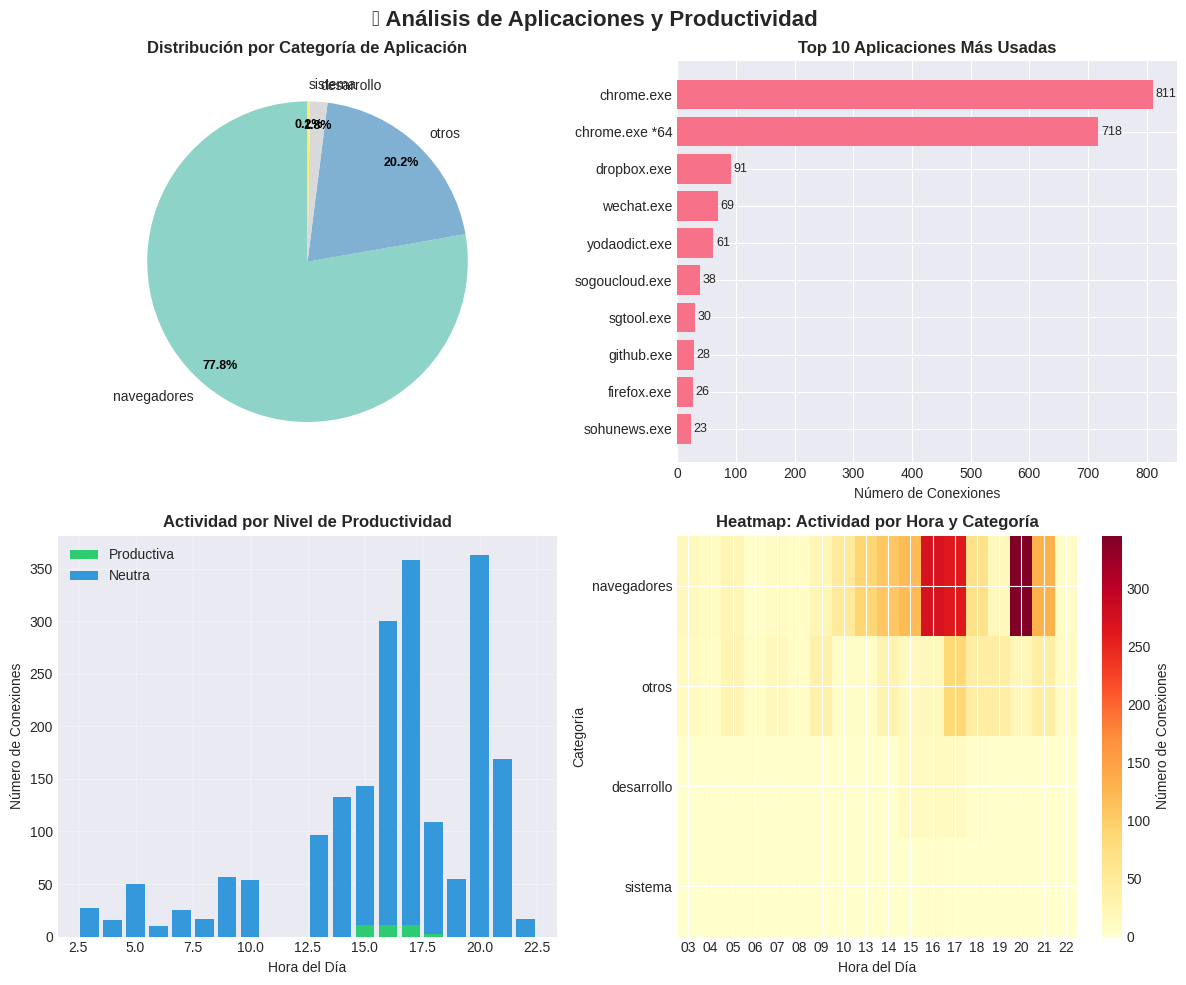

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('📊 Análisis de Aplicaciones y Productividad', fontsize=16, fontweight='bold')

# 1. Gráfico de torta de categorías
ax1 = axes[0, 0]
cat_counts = proxi_clean['categoria'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(cat_counts)))
wedges, texts, autotexts = ax1.pie(cat_counts.values,
                                  labels=cat_counts.index,
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  startangle=90,
                                  pctdistance=0.85)

# Mejorar etiquetas
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(9)
    autotext.set_color('black')
    autotext.set_fontweight('bold')

ax1.set_title('Distribución por Categoría de Aplicación', fontsize=12, fontweight='bold')

# 2. Top 10 aplicaciones
ax2 = axes[0, 1]
top_10_apps = proxi_clean['proceso_limpio'].value_counts().head(10)
bars = ax2.barh(range(len(top_10_apps)), top_10_apps.values)
ax2.set_yticks(range(len(top_10_apps)))
ax2.set_yticklabels([app[:20] + '...' if len(app) > 20 else app for app in top_10_apps.index])
ax2.invert_yaxis()
ax2.set_xlabel('Número de Conexiones')
ax2.set_title('Top 10 Aplicaciones Más Usadas', fontsize=12, fontweight='bold')

# Añadir valores en las barras
for bar in bars:
    width = bar.get_width()
    ax2.text(width + 5, bar.get_y() + bar.get_height()/2,
            f'{int(width)}', ha='left', va='center', fontsize=9)

# 3. Evolución de productividad por hora
ax3 = axes[1, 0]
if 'hora' in proxi_clean.columns and 'productividad' in proxi_clean.columns:
    productividad_hora = proxi_clean.groupby(['hora', 'productividad']).size().unstack(fill_value=0)

    horas = sorted(productividad_hora.index)
    bottom = np.zeros(len(horas))

    colores_productividad = {
        'productiva': '#2ecc71',      # Verde
        'neutra': '#3498db',          # Azul
        'no_productiva': '#e74c3c'    # Rojo
    }

    for tipo in ['productiva', 'neutra', 'no_productiva']:
        if tipo in productividad_hora.columns:
            valores = [productividad_hora.loc[h, tipo] if h in productividad_hora.index else 0 for h in horas]
            ax3.bar(horas, valores, bottom=bottom, label=tipo.capitalize(),
                   color=colores_productividad.get(tipo, 'gray'))
            bottom += valores

    ax3.set_xlabel('Hora del Día')
    ax3.set_ylabel('Número de Conexiones')
    ax3.set_title('Actividad por Nivel de Productividad', fontsize=12, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
else:
    ax3.text(0.5, 0.5, 'Datos insuficientes\npara análisis de productividad',
            transform=ax3.transAxes, ha='center', va='center', fontsize=13, color='gray')

# 4. Heatmap de actividad por hora y categoría
ax4 = axes[1, 1]
if 'hora' in proxi_clean.columns and 'categoria' in proxi_clean.columns:
    # Crear matriz para heatmap
    heatmap_data = proxi_clean.groupby(['hora', 'categoria']).size().unstack(fill_value=0)

    # Ordenar categorías por frecuencia total
    categorias_ordenadas = proxi_clean['categoria'].value_counts().index
    heatmap_data = heatmap_data[categorias_ordenadas]

    # Crear heatmap
    im = ax4.imshow(heatmap_data.T, aspect='auto', cmap='YlOrRd')

    # Configurar ejes
    ax4.set_xlabel('Hora del Día')
    ax4.set_ylabel('Categoría')
    ax4.set_title('Heatmap: Actividad por Hora y Categoría', fontsize=12, fontweight='bold')

    # Etiquetas en ejes
    ax4.set_xticks(range(len(heatmap_data.index)))
    ax4.set_xticklabels([f"{int(h):02d}" for h in heatmap_data.index], rotation=0)
    ax4.set_yticks(range(len(heatmap_data.columns)))
    ax4.set_yticklabels(heatmap_data.columns)

    # Barra de color
    plt.colorbar(im, ax=ax4, label='Número de Conexiones')
else:
    ax4.text(0.5, 0.5, 'Datos insuficientes\npara heatmap',
            transform=ax4.transAxes, ha='center', va='center', fontsize=13, color='gray')

plt.tight_layout()
plt.show()

In [36]:
# 7. Métricas de Productividad Avanzadas
print("\n\n7️⃣ MÉTRICAS AVANZADAS DE PRODUCTIVIDAD")
print("-" * 40)

if 'hora' in proxi_clean.columns and 'categoria' in proxi_clean.columns:
    # Definir horario laboral (9:00-17:59)
    horario_laboral = range(9, 18)

    # Filtrar datos laborales
    datos_laborales = proxi_clean[proxi_clean['hora'].isin(horario_laboral)]

    if len(datos_laborales) > 0:
        total_laboral = len(datos_laborales)

        # Actividad productiva en horario laboral
        prod_laboral = datos_laborales[datos_laborales['categoria'].isin(categorias_productivas)]
        no_prod_laboral = datos_laborales[datos_laborales['categoria'].isin(categorias_no_productivas)]
        neutro_laboral = total_laboral - len(prod_laboral) - len(no_prod_laboral)

        print(f"\n📊 ACTIVIDAD EN HORARIO LABORAL (9:00-17:59):")
        print(f"   • Total conexiones: {total_laboral}")
        print(f"   • Productivas: {len(prod_laboral)} ({(len(prod_laboral)/total_laboral)*100:.1f}%)")
        print(f"   • Neutras: {neutro_laboral} ({(neutro_laboral/total_laboral)*100:.1f}%)")
        print(f"   • No productivas: {len(no_prod_laboral)} ({(len(no_prod_laboral)/total_laboral)*100:.1f}%)")

        # Eficiencia laboral (ratio productivo/no productivo)
        if len(no_prod_laboral) > 0:
            ratio_eficiencia = len(prod_laboral) / len(no_prod_laboral)
            print(f"   • Ratio Productivo/No Productivo: {ratio_eficiencia:.2f}")

            # Interpretación del ratio
            if ratio_eficiencia > 3:
                eficiencia_nivel = "Excelente 🏆"
            elif ratio_eficiencia > 2:
                eficiencia_nivel = "Buena 👍"
            elif ratio_eficiencia > 1:
                eficiencia_nivel = "Aceptable ✅"
            else:
                eficiencia_nivel = "Mejorable ⚠️"

            print(f"   • Nivel de Eficiencia: {eficiencia_nivel}")

        # Patrones de inicio y fin de jornada
        print(f"\n⏰ PATRONES DE JORNADA:")

        # Primera actividad productiva del día
        if len(prod_laboral) > 0:
            hora_inicio_productiva = prod_laboral['hora'].min()
            print(f"   • Primera actividad productiva: {int(hora_inicio_productiva):02d}:00")

        # Última actividad productiva del día
        if len(prod_laboral) > 0:
            hora_fin_productiva = prod_laboral['hora'].max()
            print(f"   • Última actividad productiva: {int(hora_fin_productiva):02d}:00")

        # Horas de mayor foco productivo
        horas_foco = prod_laboral['hora'].value_counts().head(3)
        print(f"   • Horas de mayor foco productivo:")
        for hora, count in horas_foco.items():
            print(f"     - {int(hora):02d}:00: {count} conexiones")

        # 8. Recomendaciones de productividad
        print("\n\n8️⃣ RECOMENDACIONES DE PRODUCTIVIDAD")
        print("-" * 40)

        # Identificar horas con baja productividad
        horas_baja_productividad = []
        for hora in horario_laboral:
            if hora in productividad_por_hora.index:
                pct_productiva = productividad_por_hora.loc[hora, '%_productiva']
                if pct_productiva < 30:  # Umbral
                    horas_baja_productividad.append((hora, pct_productiva))

        if horas_baja_productividad:
            print(f"⚠️ HORAS CON BAJA PRODUCTIVIDAD (<30%):")
            for hora, pct in horas_baja_productividad:
                # Identificar categoría dominante en esa hora
                datos_hora = datos_laborales[datos_laborales['hora'] == hora]
                if not datos_hora.empty:
                    cat_dominante = datos_hora['categoria'].value_counts().index[0]
                    print(f"   • {int(hora):02d}:00: {pct:.1f}% productiva → Mayoría: {cat_dominante}")

        # Sugerir bloqueos de tiempo
        if len(horas_foco) > 0:
            mejor_hora = horas_foco.index[0]
            print(f"\n💡 SUGERENCIA: Bloquear tiempo para trabajo concentrado a las {int(mejor_hora):02d}:00")

        # Reducir aplicaciones no productivas
        if len(no_prod_laboral) > 0:
            apps_no_prod_top = no_prod_laboral['proceso_limpio'].value_counts().head(3)
            print(f"\n🔍 APLICACIONES NO PRODUCTIVAS MÁS USADAS:")
            for app, count in apps_no_prod_top.items():
                porcentaje = (count / len(no_prod_laboral)) * 100
                print(f"   • {app}: {count} veces ({porcentaje:.1f}% del tiempo no productivo)")



7️⃣ MÉTRICAS AVANZADAS DE PRODUCTIVIDAD
----------------------------------------

📊 ACTIVIDAD EN HORARIO LABORAL (9:00-17:59):
   • Total conexiones: 1142
   • Productivas: 33 (2.9%)
   • Neutras: 1109 (97.1%)
   • No productivas: 0 (0.0%)

⏰ PATRONES DE JORNADA:
   • Primera actividad productiva: 15:00
   • Última actividad productiva: 17:00
   • Horas de mayor foco productivo:
     - 17:00: 11 conexiones
     - 15:00: 11 conexiones
     - 16:00: 11 conexiones


8️⃣ RECOMENDACIONES DE PRODUCTIVIDAD
----------------------------------------
⚠️ HORAS CON BAJA PRODUCTIVIDAD (<30%):
   • 09:00: 0.0% productiva → Mayoría: otros
   • 10:00: 0.0% productiva → Mayoría: navegadores
   • 13:00: 0.0% productiva → Mayoría: navegadores
   • 14:00: 0.0% productiva → Mayoría: navegadores
   • 15:00: 7.7% productiva → Mayoría: navegadores
   • 16:00: 3.7% productiva → Mayoría: navegadores
   • 17:00: 3.1% productiva → Mayoría: navegadores

💡 SUGERENCIA: Bloquear tiempo para trabajo concentrado a las

In [37]:
print("\n" + "=" * 70)
print("📋 RESUMEN: APLICACIONES Y PRODUCTIVIDAD")
print("=" * 70)

# Calcular métricas clave
if 'categoria' in proxi_clean.columns:
    total_conexiones = len(proxi_clean)
    conexiones_productivas = len(proxi_clean[proxi_clean['categoria'].isin(categorias_productivas)])
    conexiones_no_productivas = len(proxi_clean[proxi_clean['categoria'].isin(categorias_no_productivas)])

    print(f"""
**APLICACIONES PREDOMINANTES:**
   • Principal categoría: {cat_stats.index[0]} ({cat_stats.iloc[0]/total_conexiones*100:.1f}% del tiempo)
   • Navegadores representan: {cat_stats.get('navegadores', 0)/total_conexiones*100:.1f}% del tráfico
   • {apps_ranking.shape[0]} aplicaciones únicas detectadas

**NIVEL DE PRODUCTIVIDAD:**
   • Actividad productiva: {conexiones_productivas/total_conexiones*100:.1f}%
   • Actividad no productiva: {conexiones_no_productivas/total_conexiones*100:.1f}%
   • Actividad neutra: {(total_conexiones - conexiones_productivas - conexiones_no_productivas)/total_conexiones*100:.1f}%

**PATRONES TEMPORALES:**
   • Hora más productiva: {int(horas_productivas.index[0]):02d}:00 ({horas_productivas.iloc[0, -1]:.1f}% productiva)
   • {'Hora con más aplicaciones no productivas detectadas' if 'no_productiva' in productividad_por_hora.columns else 'Patrón de productividad estable'}

**HALLazGOS CLAVE:**
   • {'✅ Uso predominante de aplicaciones laborales' if cat_stats.get('ofimatica', 0) + cat_stats.get('desarrollo', 0) > cat_stats.get('navegadores', 0) else '⚠️ Alto uso de navegadores'}
   • {'⚠️ Aplicaciones inusuales detectadas' if apps_inusuales else '✅ Solo aplicaciones estándar en uso'}
   • {'🔄 Mezcla equilibrada de actividades' if 30 < (conexiones_productivas/total_conexiones*100) < 70 else '⚖️ Desbalance en tipos de actividad'}

**RECOMENDACIONES:**
   1. {'Optimizar horario de trabajo concentrado' if len(horas_foco) > 0 else 'Establecer horarios de trabajo enfocado'}
   2. {'Limitar aplicaciones no productivas en horas clave' if len(no_prod_laboral) > 0 else 'Mantener buen enfoque en horas laborales'}
   3. {'Auditar aplicaciones inusuales' if apps_inusuales else 'Mantener políticas actuales de software'}
   4. {'Redistribuir carga de trabajo según patrones de productividad' if len(horas_baja_productividad) > 0 else 'Aprovechar patrones productivos existentes'}
""")

# Guardar resultados para reporte
try:
    # Crear DataFrame de resumen
    resumen_productividad = pd.DataFrame({
        'Metrica': [
            'Total conexiones analizadas',
            'Aplicaciones únicas detectadas',
            'Porcentaje actividad productiva',
            'Porcentaje actividad no productiva',
            'Hora de mayor productividad',
            'Categoría predominante',
            'Aplicación más usada'
        ],
        'Valor': [
            f"{total_conexiones}",
            f"{apps_ranking.shape[0]}",
            f"{conexiones_productivas/total_conexiones*100:.1f}%",
            f"{conexiones_no_productivas/total_conexiones*100:.1f}%",
            f"{int(horas_productivas.index[0]):02d}:00",
            cat_stats.index[0],
            apps_ranking.index[0]
        ]
    })

    print("\nRESUMEN TABULAR PARA REPORTE:")
    print("-" * 50)
    print(resumen_productividad.to_string(index=False))

except Exception as e:
    print(f"\nNota: Error al generar resumen tabular: {e}")


📋 RESUMEN: APLICACIONES Y PRODUCTIVIDAD

**APLICACIONES PREDOMINANTES:**
   • Principal categoría: navegadores (77.8% del tiempo)
   • Navegadores representan: 77.8% del tráfico
   • 32 aplicaciones únicas detectadas

**NIVEL DE PRODUCTIVIDAD:**
   • Actividad productiva: 1.8%
   • Actividad no productiva: 0.0%
   • Actividad neutra: 98.2%

**PATRONES TEMPORALES:**
   • Hora más productiva: 15:00 (7.7% productiva)
   • Patrón de productividad estable

**HALLazGOS CLAVE:**
   • ⚠️ Alto uso de navegadores
   • ⚠️ Aplicaciones inusuales detectadas
   • ⚖️ Desbalance en tipos de actividad

**RECOMENDACIONES:**
   1. Optimizar horario de trabajo concentrado
   2. Mantener buen enfoque en horas laborales
   3. Auditar aplicaciones inusuales
   4. Redistribuir carga de trabajo según patrones de productividad


RESUMEN TABULAR PARA REPORTE:
--------------------------------------------------
                           Metrica       Valor
       Total conexiones analizadas        2000
    Aplic

In [41]:
proxi_clean.head()

,timestamp,process,destination,proxy_used,protocol,raw_line,hora
0,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16
1,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16
2,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16
3,10.30 16:49:07,chrome.exe,"proxy.cse.cuhk.edu.hk:5070 close, 0 bytes sent...",None,None,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16
4,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16


In [43]:
!pip install tldextract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 2.6 MB/s eta 0:00:00


In [46]:
print("=" * 60)
print("ANÁLISIS DE DESTINOS FRECUENTES")
print("=" * 60)

import tldextract
import socket
from urllib.parse import urlparse

# Verificar columnas disponibles
print("Columnas disponibles en el DataFrame:")
print(proxi_clean.columns.tolist())

# Identificar columna de destino
dest_col = None
for col in ['destination', 'Destination', 'destino', 'proxy', 'proxy_used']:
    if col in proxi_clean.columns:
        dest_col = col
        break

if not dest_col:
    print("ERROR: No se encontró columna de destino")
    # Buscar cualquier columna que contenga URLs o dominios
    for col in proxi_clean.columns:
        sample = proxi_clean[col].dropna().head(1).iloc[0] if not proxi_clean[col].dropna().empty else ""
        if isinstance(sample, str) and ('.' in sample and ':' in sample):
            dest_col = col
            print(f"Usando columna '{col}' como destino")
            break

if dest_col:
    print(f"\nUsando columna '{dest_col}' para análisis de destinos")

    # 1. Extraer dominios de los destinos
    def extract_domain(destination):
        """Extrae el dominio principal de un destino"""
        if not isinstance(destination, str):
            return None

        try:
            # Limpiar y extraer
            dest = destination.strip()

            # Si es formato host:puerto
            if ':' in dest:
                host = dest.split(':')[0]
            else:
                host = dest

            # Extraer dominio usando tldextract (mejor que split simple)
            extracted = tldextract.extract(host)

            if extracted.domain and extracted.suffix:
                domain = f"{extracted.domain}.{extracted.suffix}"
                return domain.lower()
            elif extracted.domain:
                return extracted.domain.lower()
            else:
                return None

        except Exception as e:
            return None

    proxi_clean['dominio'] = proxi_clean[dest_col].apply(extract_domain)

    # 2. Extraer TLD (Top Level Domain)
    def extract_tld(domain):
        """Extrae el TLD de un dominio"""
        if not domain:
            return None
        parts = domain.split('.')
        return parts[-1] if len(parts) > 1 else None

    proxi_clean['tld'] = proxi_clean['dominio'].apply(extract_tld)

    # 3. Extraer subdominio si existe
    def extract_subdomain(destination):
        """Extrae el subdominio completo"""
        if not isinstance(destination, str):
            return None

        try:
            extracted = tldextract.extract(destination.split(':')[0] if ':' in destination else destination)

            if extracted.subdomain:
                return extracted.subdomain.lower()
            return None
        except:
            return None

    proxi_clean['subdominio'] = proxi_clean[dest_col].apply(extract_subdomain)

    # 4. Extraer puerto si existe
    def extract_port(destination):
        """Extrae el número de puerto"""
        if not isinstance(destination, str):
            return None

        try:
            if ':' in destination:
                port_part = destination.split(':')[-1]
                if port_part.isdigit():
                    return int(port_part)
            return None
        except:
            return None

    proxi_clean['puerto'] = proxi_clean[dest_col].apply(extract_port)

    # Estadísticas básicas
    total_conexiones = len(proxi_clean)
    conexiones_con_dominio = proxi_clean['dominio'].notna().sum()

    print(f"\n📊 ESTADÍSTICAS DE EXTRACCIÓN:")
    print(f"   • Total conexiones analizadas: {total_conexiones}")
    print(f"   • Conexiones con dominio extraído: {conexiones_con_dominio} ({conexiones_con_dominio/total_conexiones*100:.1f}%)")
    print(f"   • Dominios únicos identificados: {proxi_clean['dominio'].nunique()}")
    print(f"   • Puertos únicos identificados: {proxi_clean['puerto'].nunique()}")

else:
    print("\nNo se pudo identificar columna de destino. Mostrando primeras filas:")
    print(proxi_clean.head())

ANÁLISIS DE DESTINOS FRECUENTES
Columnas disponibles en el DataFrame:
['timestamp', 'process', 'destination', 'proxy_used', 'protocol', 'raw_line', 'hora', 'dominio', 'tld', 'subdominio', 'puerto']

Usando columna 'destination' para análisis de destinos

📊 ESTADÍSTICAS DE EXTRACCIÓN:
   • Total conexiones analizadas: 2000
   • Conexiones con dominio extraído: 2000 (100.0%)
   • Dominios únicos identificados: 109
   • Puertos únicos identificados: 61


In [48]:
proxi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    2000 non-null   object 
 1   process      2000 non-null   object 
 2   destination  2000 non-null   object 
 3   proxy_used   956 non-null    object 
 4   protocol     956 non-null    object 
 5   raw_line     2000 non-null   object 
 6   hora         2000 non-null   int64  
 7   dominio      2000 non-null   object 
 8   tld          1998 non-null   object 
 9   subdominio   1955 non-null   object 
 10  puerto       1693 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 172.0+ KB


In [50]:
# 1. Ranking de dominios más accedidos
print("\n\n DOMINIOS MÁS ACCEDIDOS")
print("-" * 50)

if 'dominio' in proxi_clean.columns:
    dominio_ranking = proxi_clean['dominio'].value_counts()

    print(f"\nTOP 20 DOMINIOS MÁS FRECUENTES:")
    print("-" * 60)
    print(f"{'Posición':<10} {'Dominio':<40} {'Conexiones':<12} {'Porcentaje':<10}")
    print("-" * 60)

    for i, (dominio, count) in enumerate(dominio_ranking.head(20).items(), 1):
        porcentaje = (count / total_conexiones) * 100
        print(f"{i:<10} {dominio[:38]:<40} {count:<12} {porcentaje:<10.2f}%")

    # Análisis de concentración
    print(f"\nANÁLISIS DE CONCENTRACIÓN:")

    for top_n in [1, 3, 5, 10]:
        top_dominios = dominio_ranking.head(top_n).sum()
        porcentaje_top = (top_dominios / total_conexiones) * 100
        print(f"   • Top {top_n} dominios: {porcentaje_top:.1f}% del tráfico")

    # Dominios internos vs externos
    print(f"\nDOMINIOS INTERNOS VS EXTERNOS:")

    dominios_internos = ['cuhk.edu.hk', 'hku.hk', 'edu.hk', 'intra', 'local']
    conexiones_internas = proxi_clean[proxi_clean['dominio'].apply(
        lambda x: any(interno in str(x) for interno in dominios_internos) if x else False
    )]

    print(f"   • Conexiones internas (edu.hk): {len(conexiones_internas)} ({(len(conexiones_internas)/total_conexiones)*100:.1f}%)")
    print(f"   • Conexiones externas: {total_conexiones - len(conexiones_internas)} ({((total_conexiones - len(conexiones_internas))/total_conexiones)*100:.1f}%)")

    # 2. Análisis por TLD
    print("\n\nDISTRIBUCIÓN POR TLD (EXTENSIÓN DE DOMINIO)")
    print("-" * 50)

    if 'tld' in proxi_clean.columns:
        tld_stats = proxi_clean['tld'].value_counts()

        print(f"\nTLDs MÁS COMUNES:")
        for tld, count in tld_stats.head(10).items():
            porcentaje = (count / total_conexiones) * 100
            print(f"   • .{tld:<10}: {count:>6} conexiones ({porcentaje:5.1f}%)")

        # Categorizar TLDs
        categorias_tld = {
            'educacional': ['edu', 'ac', 'school'],
            'comercial': ['com', 'net', 'org', 'biz', 'info'],
            'país': ['hk', 'cn', 'us', 'uk', 'jp', 'de', 'fr'],
            'gobierno': ['gov', 'gob', 'mil'],
            'tecnología': ['tech', 'io', 'ai', 'dev'],
            'otros': []
        }

        def categorizar_tld(tld):
            if not tld:
                return 'desconocido'
            for categoria, tlds in categorias_tld.items():
                if tld in tlds:
                    return categoria
            return 'otros'

        proxi_clean['categoria_tld'] = proxi_clean['tld'].apply(categorizar_tld)

        cat_tld_stats = proxi_clean['categoria_tld'].value_counts()
        print(f"\nCATEGORÍAS POR TLD:")
        for cat, count in cat_tld_stats.items():
            porcentaje = (count / total_conexiones) * 100
            print(f"   • {cat.upper():<15}: {count:>6} conexiones ({porcentaje:5.1f}%)")



 DOMINIOS MÁS ACCEDIDOS
--------------------------------------------------

TOP 20 DOMINIOS MÁS FRECUENTES:
------------------------------------------------------------
Posición   Dominio                                  Conexiones   Porcentaje
------------------------------------------------------------
1          cuhk.edu.hk                              908          45.40     %
2          google.com                               174          8.70      %
3          baidu.com                                119          5.95      %
4          dropbox.com                              85           4.25      %
5          qq.com                                   69           3.45      %
6          sogou.com                                65           3.25      %
7          github.com                               43           2.15      %
8          gstatic.com                              32           1.60      %
9          ydstatic.com                             31           1.55      %

In [52]:
# 3. Análisis de subdominios
print("\n\nANÁLISIS DE SUBDOMINIOS")
print("-" * 50)

if 'subdominio' in proxi_clean.columns and 'dominio' in proxi_clean.columns:
    # Filtrar conexiones con subdominio
    conexiones_con_subdominio = proxi_clean[proxi_clean['subdominio'].notna()]

    if len(conexiones_con_subdominio) > 0:
        print(f"Conexiones con subdominio: {len(conexiones_con_subdominio)} ({(len(conexiones_con_subdominio)/total_conexiones)*100:.1f}%)")

        # Subdominios más comunes
        subdominio_stats = conexiones_con_subdominio['subdominio'].value_counts().head(10)

        print(f"\nSUBDOMINIOS MÁS FRECUENTES:")
        for subd, count in subdominio_stats.items():
            porcentaje = (count / len(conexiones_con_subdominio)) * 100
            print(f"   • {subd:<30}: {count:>4} conexiones ({porcentaje:5.1f}%)")

        # Análisis por dominio principal
        print(f"\nESTRUCTURA DE SUBDOMINIOS POR DOMINIO PRINCIPAL:")

        dominios_con_subd = conexiones_con_subdominio['dominio'].unique()[:5]
        for dominio in dominios_con_subd:
            subds_dominio = conexiones_con_subdominio[conexiones_con_subdominio['dominio'] == dominio]['subdominio'].value_counts().head(3)
            if not subds_dominio.empty:
                print(f"\n   {dominio}:")
                for subd, count in subds_dominio.items():
                    print(f"     - {subd}: {count} conexiones")
    else:
        print("   No se encontraron conexiones con subdominios identificables")

    # 4. Análisis de profundidad de subdominios
    print(f"\n\nPROFUNDIDAD DE SUBDOMINIOS")
    print("-" * 50)

    def contar_niveles_subdominio(subd):
        if not subd:
            return 0
        return len(subd.split('.'))

    proxi_clean['niveles_subdominio'] = proxi_clean['subdominio'].apply(contar_niveles_subdominio)

    niveles_stats = proxi_clean['niveles_subdominio'].value_counts().sort_index()

    print(f"\nDISTRIBUCIÓN POR PROFUNDIDAD:")
    for niveles, count in niveles_stats.items():
        if niveles > 0:
            porcentaje = (count / len(conexiones_con_subdominio)) * 100 if len(conexiones_con_subdominio) > 0 else 0
            print(f"   • {niveles} nivel(es): {count:>4} conexiones ({porcentaje:5.1f}%)")



ANÁLISIS DE SUBDOMINIOS
--------------------------------------------------
Conexiones con subdominio: 1955 (97.8%)

SUBDOMINIOS MÁS FRECUENTES:
   • proxy.cse                     :  908 conexiones ( 46.4%)
   • www                           :  106 conexiones (  5.4%)
   • t12                           :   31 conexiones (  1.6%)
   • clients6                      :   30 conexiones (  1.5%)
   • api                           :   30 conexiones (  1.5%)
   • get                           :   27 conexiones (  1.4%)
   • client-cf                     :   25 conexiones (  1.3%)
   • clients4                      :   19 conexiones (  1.0%)
   • block                         :   19 conexiones (  1.0%)
   • mtalk                         :   19 conexiones (  1.0%)

ESTRUCTURA DE SUBDOMINIOS POR DOMINIO PRINCIPAL:

   cuhk.edu.hk:
     - proxy.cse: 908 conexiones

   sogou.com:
     - get: 27 conexiones
     - info.pinyin: 11 conexiones
     - security.ie: 10 conexiones

   tencent.com:
     - t

In [55]:
def categorizar_puerto(puerto):
    # Verificar si es NaN (nulo)
    if pd.isna(puerto):
        return 'no_identificado'

    # Si es string, verificar si está vacío
    if isinstance(puerto, str):
        puerto = puerto.strip()
        if puerto == '' or puerto.lower() in ['nan', 'null', 'none', 'n/a']:
            return 'no_identificado'

    try:
        # Intentar convertir a entero
        puerto_int = int(float(puerto))  # Usar float primero por si hay decimales

        # Rangos conocidos de puertos
        if puerto_int == 80:
            return 'http'
        elif puerto_int == 443:
            return 'https'
        elif puerto_int == 8080:
            return 'proxy_http'
        elif puerto_int == 8443:
            return 'proxy_https'
        elif 1024 <= puerto_int <= 49151:
            return 'registrado'
        elif 0 <= puerto_int <= 1023:
            return 'bien_conocido'
        elif 49152 <= puerto_int <= 65535:
            return 'dinamico_privado'
        else:
            return 'fuera_rango'

    except (ValueError, TypeError):
        # Si no se puede convertir, categorizar como no identificado
        return 'no_identificado'

In [57]:
proxi_clean.head(30)

,timestamp,process,destination,proxy_used,protocol,raw_line,hora,dominio,tld,subdominio,puerto,categoria_tld,niveles_subdominio
0,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2
1,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2
2,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2
3,10.30 16:49:07,chrome.exe,"proxy.cse.cuhk.edu.hk:5070 close, 0 bytes sent...",None,None,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,1.0,país,2
4,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2
5,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2
6,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2
7,10.30 16:49:07,chrome.exe,"proxy.cse.cuhk.edu.hk:5070 close, 403 bytes se...",None,None,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,NaN,país,2
8,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2
9,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2


In [63]:
proxi_clean[["categoria_tld"]].head(30)

,categoria_tld
0,país
1,país
2,país
3,país
4,país
5,país
6,país
7,país
8,país
9,país


In [59]:
proxi_clean.head(3)

,timestamp,process,destination,proxy_used,protocol,raw_line,hora,dominio,tld,subdominio,puerto,categoria_tld,niveles_subdominio
0,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2
1,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2
2,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2


In [66]:
proxi_clean[["puerto"]].head(60)

,puerto
0,5070.0
1,5070.0
2,5070.0
3,1.0
4,5070.0
5,5070.0
6,5070.0
7,NaN
8,5070.0
9,5070.0


In [74]:
proxi_clean["puerto"].head(50)

,puerto
0,5070.0
1,5070.0
2,5070.0
3,1.0
4,5070.0
5,5070.0
6,5070.0
7,NaN
8,5070.0
9,5070.0


In [77]:
# Calcular la media de la columna 'puerto' (excluyendo NaN)
proxi_clean['puerto'].mean()


np.float64(1458.9480212640283)

In [79]:
proxi_clean['puerto'] = proxi_clean['puerto'].fillna(proxi_clean['puerto'].mean())

In [80]:
proxi_clean

,timestamp,process,destination,proxy_used,protocol,raw_line,hora,dominio,tld,subdominio,puerto,categoria_tld,niveles_subdominio
0,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2
1,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2
2,10.30 16:49:06,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2
3,10.30 16:49:07,chrome.exe,"proxy.cse.cuhk.edu.hk:5070 close, 0 bytes sent...",None,None,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,1.0,país,2
4,10.30 16:49:07,chrome.exe,proxy.cse.cuhk.edu.hk:5070,proxy.cse.cuhk.edu.hk:5070,HTTPS,[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.e...,16,cuhk.edu.hk,hk,proxy.cse,5070.0,país,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,07.27 10:23:30,chrome.exe *64,"cpro.baidustatic.com:443 close, 334 bytes sent...",None,None,[07.27 10:23:30] chrome.exe *64 - cpro.baidust...,10,baidustatic.com,com,cpro,22.0,comercial,1
1996,07.27 10:23:30,chrome.exe *64,q1.cnzz.com:80,proxy.cse.cuhk.edu.hk:5070,HTTPS,[07.27 10:23:30] chrome.exe *64 - q1.cnzz.com:...,10,cnzz.com,com,q1,80.0,comercial,1
1997,07.27 10:23:42,chrome.exe *64,"t12.baidu.com:80 close, 0 bytes sent, 0 bytes ...",None,None,[07.27 10:23:42] chrome.exe *64 - t12.baidu.co...,10,baidu.com,com,t12,17.0,comercial,1
1998,07.27 10:23:42,chrome.exe *64,"mhfm9.us.cdndm5.com:80 close, 0 bytes sent, 0 ...",None,None,[07.27 10:23:42] chrome.exe *64 - mhfm9.us.cdn...,10,cdndm5.com,com,mhfm9.us,12.0,comercial,2


In [85]:
proxi_clean[["puerto"]].head(50)

,puerto
0,5070.000000
1,5070.000000
2,5070.000000
3,1.000000
4,5070.000000
5,5070.000000
6,5070.000000
7,1458.948021
8,5070.000000
9,5070.000000


In [88]:
# 5. Análisis de puertos
print("\n\nANÁLISIS DE PUERTOS")
print("-" * 50)

if 'puerto' in proxi_clean.columns:
    puerto_stats = proxi_clean['puerto'].value_counts()
    conexiones_con_puerto = proxi_clean['puerto'].notna().sum()

    print(f"Conexiones con puerto identificado: {conexiones_con_puerto} ({(conexiones_con_puerto/total_conexiones)*100:.1f}%)")
    print(f"Puertos únicos identificados: {puerto_stats.shape[0]}")

    # Puertos más comunes
    print(f"\nPUERTOS MÁS UTILIZADOS:")
    print("-" * 40)

    # Diccionario de puertos conocidos
    puertos_conocidos = {
        80: 'HTTP',
        443: 'HTTPS',
        21: 'FTP',
        22: 'SSH',
        23: 'Telnet',
        25: 'SMTP',
        53: 'DNS',
        110: 'POP3',
        143: 'IMAP',
        445: 'SMB',
        3389: 'RDP',
        5900: 'VNC',
        8080: 'HTTP-Alt',
        8443: 'HTTPS-Alt'
    }

    for puerto, count in puerto_stats.head(10).items():
        servicio = puertos_conocidos.get(puerto, 'Desconocido')
        porcentaje = (count / conexiones_con_puerto) * 100
        print(f"   • Puerto {puerto:>5}: {count:>6} conexiones ({porcentaje:5.1f}%) - {servicio}")

    # Categorizar por tipo de puerto
    def categorizar_puerto(puerto):
        if not puerto:
            return 'no_identificado'

        puerto = int(puerto)

        # Rangos conocidos
        if puerto == 443:
            return 'https'
        elif puerto == 80:
            return 'http'
        elif 0 < puerto < 1024:
            return 'sistema'
        elif 1024 <= puerto < 49152:
            return 'usuario'
        elif 49152 <= puerto <= 65535:
            return 'dinamico'
        else:
            return 'desconocido'

    proxi_clean['categoria_puerto'] = proxi_clean['puerto'].apply(categorizar_puerto)

    cat_puerto_stats = proxi_clean['categoria_puerto'].value_counts()

    print(f"\nCATEGORÍAS DE PUERTOS:")
    for cat, count in cat_puerto_stats.items():
        porcentaje = (count / total_conexiones) * 100
        print(f"   • {cat.upper():<15}: {count:>6} conexiones ({porcentaje:5.1f}%)")

    # 6. Correlación puerto-protocolo
    print(f"\n\nCORRELACIÓN PUERTO-PROTOCOLO")
    print("-" * 50)

    if 'protocol' in proxi_clean.columns or 'Protocol' in proxi_clean.columns:
        protocol_col = 'protocol' if 'protocol' in proxi_clean.columns else 'Protocol'

        # Crear tabla cruzada
        if 'categoria_puerto' in proxi_clean.columns:
            cross_tab = pd.crosstab(proxi_clean[protocol_col], proxi_clean['categoria_puerto'])

            print(f"\nDISTRIBUCIÓN PROTOCOLO vs CATEGORÍA DE PUERTO:")
            print("-" * 60)
            print(f"{'Protocolo':<15}", end="")
            for cat in cross_tab.columns:
                print(f" {cat[:10]:>10}", end="")
            print()
            print("-" * 60)

            for protocolo in cross_tab.index:
                print(f"{protocolo:<15}", end="")
                for cat in cross_tab.columns:
                    count = cross_tab.loc[protocolo, cat]
                    print(f" {count:>10}", end="")
                print()



ANÁLISIS DE PUERTOS
--------------------------------------------------
Conexiones con puerto identificado: 2000 (100.0%)
Puertos únicos identificados: 62

PUERTOS MÁS UTILIZADOS:
----------------------------------------
   • Puerto 5070.0:    457 conexiones ( 22.9%) - Desconocido
   • Puerto 1458.9480212640283:    307 conexiones ( 15.3%) - Desconocido
   • Puerto 443.0:    284 conexiones ( 14.2%) - HTTPS
   • Puerto  80.0:    213 conexiones ( 10.7%) - HTTP
   • Puerto   1.0:    141 conexiones (  7.0%) - Desconocido
   • Puerto   0.0:     67 conexiones (  3.4%) - Desconocido
   • Puerto   2.0:     42 conexiones (  2.1%) - Desconocido
   • Puerto  11.0:     39 conexiones (  1.9%) - Desconocido
   • Puerto   5.0:     37 conexiones (  1.8%) - Desconocido
   • Puerto   3.0:     29 conexiones (  1.5%) - Desconocido

CATEGORÍAS DE PUERTOS:
   • USUARIO        :    764 conexiones ( 38.2%)
   • SISTEMA        :    672 conexiones ( 33.6%)
   • HTTPS          :    284 conexiones ( 14.2%)
   • H

In [92]:
# 7. Patrones temporales por destino
print("\n\nPATRONES TEMPORALES POR DESTINO")
print("-" * 50)

if 'hora' in proxi_clean.columns and 'dominio' in proxi_clean.columns:
    # Dominios más accedidos por hora
    print(f"\nHORAS PICO PARA PRINCIPALES DOMINIOS:")

    top_dominios = dominio_ranking.head(5).index.tolist()

    for dominio in top_dominios:
        datos_dominio = proxi_clean[proxi_clean['dominio'] == dominio]
        if len(datos_dominio) > 0:
            hora_pico_dominio = datos_dominio['hora'].value_counts().idxmax()
            count_pico = datos_dominio['hora'].value_counts().max()
            print(f"   • {dominio[:30]:<30}: Hora pico {int(hora_pico_dominio):02d}:00 ({count_pico} conexiones)")

    # Evolución horaria de categorías de TLD
    print(f"\nEVOLUCIÓN DE CATEGORÍAS DE DESTINO POR HORA:")

    if 'categoria_tld' in proxi_clean.columns:
        evolucion_categorias = proxi_clean.groupby(['hora', 'categoria_tld']).size().unstack(fill_value=0)

        # Normalizar por hora
        evolucion_normalizada = evolucion_categorias.div(evolucion_categorias.sum(axis=1), axis=0) * 100

        # Mostrar horas clave
        horas_interes = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
        categorias_interes = ['educacional', 'comercial', 'país', 'gobierno']

        print(f"\n{'Hora':<6}", end="")
        for cat in categorias_interes:
            if cat in evolucion_normalizada.columns:
                print(f" {cat[:8]:>8}", end="")
        print()
        print("-" * 40)

        for hora in horas_interes:
            if hora in evolucion_normalizada.index:
                print(f"{hora:02d}:00", end="")
                for cat in categorias_interes:
                    if cat in evolucion_normalizada.columns:
                        valor = evolucion_normalizada.loc[hora, cat]
                        print(f" {valor:8.1f}%", end="")
                print()

    # 8. Detección de patrones anómalos
    print(f"\n\nDETECCIÓN DE PATRONES ANÓMALOS")
    print("-" * 50)

    # Buscar dominios con acceso en horas inusuales
    dominios_nocturnos = []
    for dominio in proxi_clean['dominio'].unique():
        if dominio:
            datos_dom = proxi_clean[proxi_clean['dominio'] == dominio]
            # Verificar si tiene actividad nocturna (22:00-6:00)
            actividad_nocturna = datos_dom[(datos_dom['hora'] >= 22) | (datos_dom['hora'] < 6)]
            if len(actividad_nocturna) > 0:
                porcentaje_nocturno = (len(actividad_nocturna) / len(datos_dom)) * 100
                if porcentaje_nocturno > 50:  # Más del 50% de actividad nocturna
                    dominios_nocturnos.append((dominio, len(actividad_nocturna), porcentaje_nocturno))

    if dominios_nocturnos:
        print(f"DOMINIOS CON ACTIVIDAD PREDOMINANTEMENTE NOCTURNA:")
        dominios_nocturnos.sort(key=lambda x: x[2], reverse=True)
        for dominio, count, pct in dominios_nocturnos[:5]:
            print(f"   • {dominio[:40]:<40}: {count} conexiones nocturnas ({pct:.1f}%)")
    else:
        print(f"   ✅ No se detectaron dominios con actividad predominantemente nocturna")

    # Buscar dominios con acceso muy esporádico
    dominios_esporadicos = []
    for dominio, count in dominio_ranking.items():
        if 1 < count <= 5:  # Entre 2 y 5 conexiones
            datos_dom = proxi_clean[proxi_clean['dominio'] == dominio]
            # Verificar si las conexiones están muy dispersas en el tiempo
            if 'timestamp' in proxi_clean.columns:
                # Asumiendo que timestamp está en formato string
                timestamps = datos_dom['timestamp'].tolist()
                # Podríamos analizar distribución temporal aquí
                dominios_esporadicos.append((dominio, count))

    if dominios_esporadicos and len(dominios_esporadicos) > 10:
        print(f"\nDOMINIOS CON ACCESO ESPORÁDICO (2-5 conexiones): {len(dominios_esporadicos)} encontrados")
        print(f"   Ejemplos: {', '.join([d[0] for d in dominios_esporadicos[:5]])}")



PATRONES TEMPORALES POR DESTINO
--------------------------------------------------

HORAS PICO PARA PRINCIPALES DOMINIOS:
   • cuhk.edu.hk                   : Hora pico 20:00 (347 conexiones)
   • google.com                    : Hora pico 15:00 (27 conexiones)
   • baidu.com                     : Hora pico 14:00 (42 conexiones)
   • dropbox.com                   : Hora pico 05:00 (17 conexiones)
   • qq.com                        : Hora pico 19:00 (16 conexiones)

EVOLUCIÓN DE CATEGORÍAS DE DESTINO POR HORA:

Hora   comercia     país
----------------------------------------
08:00    100.0%      0.0%
09:00     89.5%      8.8%
10:00     94.4%      0.0%
13:00     92.8%      7.2%
14:00     94.7%      3.0%
15:00     86.0%     13.3%
16:00     23.0%     76.0%
17:00     42.5%     55.3%
18:00     32.1%     56.9%


DETECCIÓN DE PATRONES ANÓMALOS
--------------------------------------------------
DOMINIOS CON ACTIVIDAD PREDOMINANTEMENTE NOCTURNA:
   • stackexchange.com                       : 3

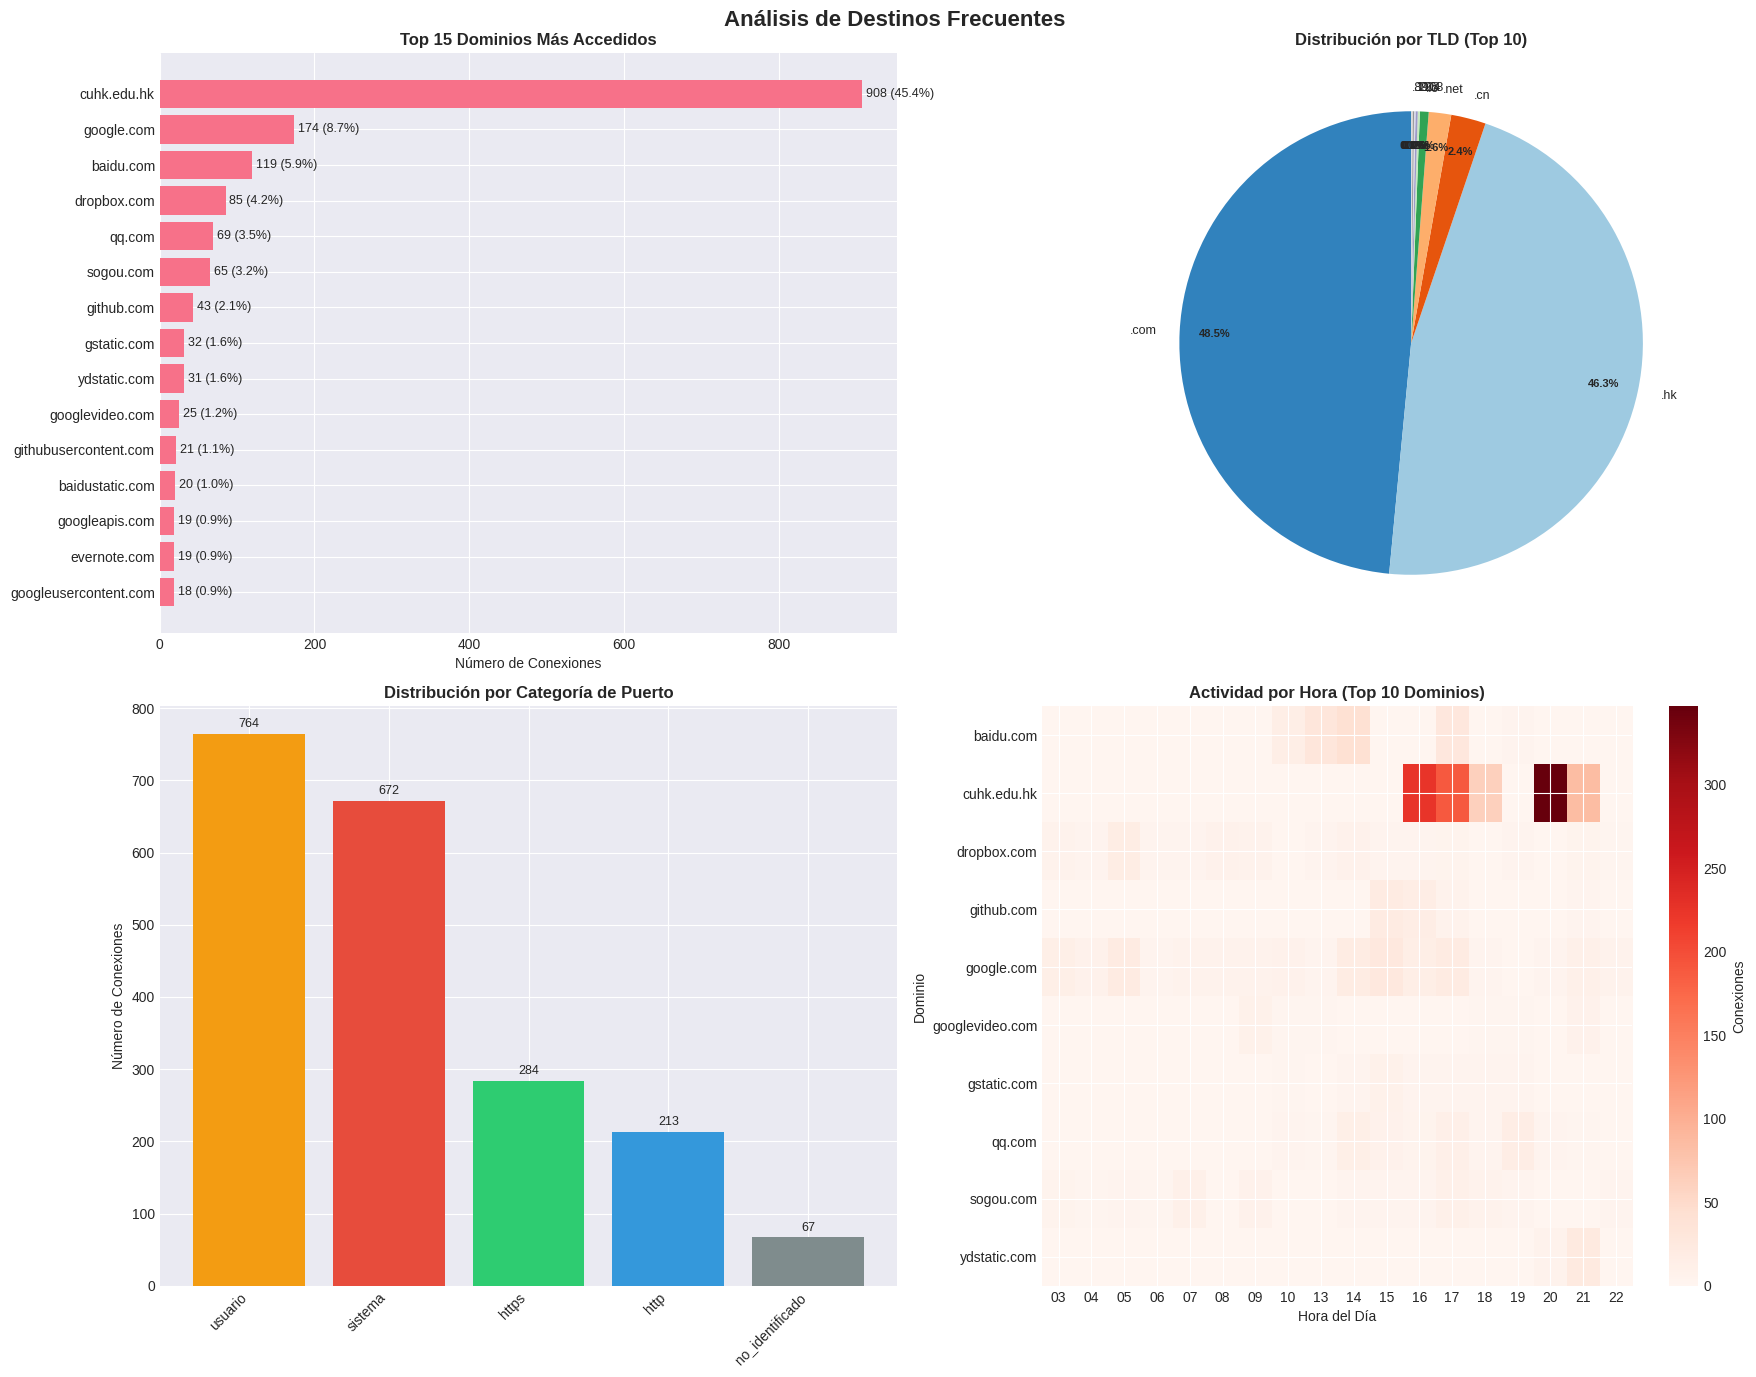

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de gráficos
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Análisis de Destinos Frecuentes', fontsize=16, fontweight='bold')

# 1. Top 15 dominios
ax1 = axes[0, 0]
top_n = 15
top_dominios_plot = dominio_ranking.head(top_n)

y_pos = np.arange(len(top_dominios_plot))
bars = ax1.barh(y_pos, top_dominios_plot.values)
ax1.set_yticks(y_pos)
ax1.set_yticklabels([d[:30] + '...' if len(d) > 30 else d for d in top_dominios_plot.index])
ax1.invert_yaxis()
ax1.set_xlabel('Número de Conexiones')
ax1.set_title(f'Top {top_n} Dominios Más Accedidos', fontsize=12, fontweight='bold')

# Añadir porcentajes
for i, (bar, count) in enumerate(zip(bars, top_dominios_plot.values)):
    porcentaje = (count / total_conexiones) * 100
    ax1.text(count + 5, bar.get_y() + bar.get_height()/2,
            f'{count} ({porcentaje:.1f}%)', ha='left', va='center', fontsize=9)

# 2. Distribución por TLD
ax2 = axes[0, 1]
if 'tld' in proxi_clean.columns:
    tld_top = proxi_clean['tld'].value_counts().head(10)

    colors_tld = plt.cm.tab20c(np.linspace(0, 1, len(tld_top)))
    wedges, texts, autotexts = ax2.pie(tld_top.values,
                                      labels=[f'.{tld}' for tld in tld_top.index],
                                      autopct='%1.1f%%',
                                      colors=colors_tld,
                                      startangle=90,
                                      pctdistance=0.85)

    for text in texts:
        text.set_fontsize(9)
    for autotext in autotexts:
        autotext.set_fontsize(8)
        autotext.set_fontweight('bold')

    ax2.set_title('Distribución por TLD (Top 10)', fontsize=12, fontweight='bold')
else:
    ax2.text(0.5, 0.5, 'Datos de TLD no disponibles',
            transform=ax2.transAxes, ha='center', va='center', fontsize=12, color='red')

# 3. Distribución de puertos
ax3 = axes[1, 0]
if 'categoria_puerto' in proxi_clean.columns:
    cat_puerto_counts = proxi_clean['categoria_puerto'].value_counts()

    colors_puertos = {'https': '#2ecc71', 'http': '#3498db', 'sistema': '#e74c3c',
                     'usuario': '#f39c12', 'dinamico': '#9b59b6', 'desconocido': '#95a5a6'}

    port_colors = [colors_puertos.get(cat, '#7f8c8d') for cat in cat_puerto_counts.index]

    bars_puertos = ax3.bar(range(len(cat_puerto_counts)), cat_puerto_counts.values, color=port_colors)
    ax3.set_xticks(range(len(cat_puerto_counts)))
    ax3.set_xticklabels(cat_puerto_counts.index, rotation=45, ha='right')
    ax3.set_ylabel('Número de Conexiones')
    ax3.set_title('Distribución por Categoría de Puerto', fontsize=12, fontweight='bold')

    # Añadir valores
    for bar, count in zip(bars_puertos, cat_puerto_counts.values):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{count}', ha='center', va='bottom', fontsize=9)
else:
    ax3.text(0.5, 0.5, 'Datos de puertos no disponibles',
            transform=ax3.transAxes, ha='center', va='center', fontsize=12, color='green')

# 4. Heatmap: Dominios vs Hora
ax4 = axes[1, 1]
if 'hora' in proxi_clean.columns and 'dominio' in proxi_clean.columns:
    # Tomar top 10 dominios y crear matriz
    top_10_dominios = dominio_ranking.head(10).index

    # Filtrar datos para top dominios
    datos_top = proxi_clean[proxi_clean['dominio'].isin(top_10_dominios)]

    if len(datos_top) > 0:
        # Crear matriz de frecuencia
        heatmap_matrix = pd.crosstab(datos_top['hora'], datos_top['dominio'])

        # Ordenar horas
        heatmap_matrix = heatmap_matrix.sort_index()

        # Crear heatmap
        im = ax4.imshow(heatmap_matrix.T, aspect='auto', cmap='Reds')

        # Configurar ejes
        ax4.set_xlabel('Hora del Día')
        ax4.set_ylabel('Dominio')
        ax4.set_title('Actividad por Hora (Top 10 Dominios)', fontsize=12, fontweight='bold')

        # Etiquetas
        ax4.set_xticks(range(len(heatmap_matrix.index)))
        ax4.set_xticklabels([f"{int(h):02d}" for h in heatmap_matrix.index], rotation=0)
        ax4.set_yticks(range(len(heatmap_matrix.columns)))
        ax4.set_yticklabels([d[:15] + '...' if len(d) > 15 else d for d in heatmap_matrix.columns])

        # Barra de color
        plt.colorbar(im, ax=ax4, label='Conexiones')
    else:
        ax4.text(0.7, 0.7, 'Datos insuficientes para heatmap',
                transform=ax4.transAxes, ha='center', va='center', fontsize=12, color='gray')
else:
    ax4.text(0.7, 0.7, 'Datos de hora/dominio no disponibles',
            transform=ax4.transAxes, ha='center', va='center', fontsize=12, color='gray')

plt.tight_layout()
plt.show()

In [98]:
print("\n" + "=" * 70)
print("RESUMEN: DESTINOS FRECUENTES")
print("=" * 70)

# Calcular métricas clave
if 'dominio' in proxi_clean.columns:
    total_dominios_unicos = proxi_clean['dominio'].nunique()
    top_dominio = dominio_ranking.index[0] if not dominio_ranking.empty else "N/A"
    top_dominio_count = dominio_ranking.iloc[0] if not dominio_ranking.empty else 0

    # Dominios internos vs externos
    es_dominio_interno = lambda x: any(interno in str(x) for interno in dominios_internos) if x else False
    conexiones_internas = proxi_clean[proxi_clean['dominio'].apply(es_dominio_interno)]

    print(f"""
 **PANORAMA GENERAL DE DESTINOS:**
   • Total dominios únicos accedidos: {total_dominios_unicos}
   • Dominio más frecuente: {top_dominio[:40]} ({top_dominio_count} conexiones)
   • Top 3 dominios concentran: {(dominio_ranking.head(3).sum()/total_conexiones)*100:.1f}% del tráfico
   • Top 10 dominios concentran: {(dominio_ranking.head(10).sum()/total_conexiones)*100:.1f}% del tráfico

 **DISTRIBUCIÓN INSTITUCIONAL VS EXTERNA:**
   • Tráfico interno (edu.hk): {(len(conexiones_internas)/total_conexiones)*100:.1f}%
   • Tráfico externo: {((total_conexiones - len(conexiones_internas))/total_conexiones)*100:.1f}%
   • Principal dominio interno: {dominio_ranking[dominio_ranking.index.str.contains('edu.hk')].index[0] if any(dominio_ranking.index.str.contains('edu.hk')) else 'No identificado'}

 **SEGURIDAD Y PROTOCOLOS:**
   • Conexiones HTTPS (puerto 443): {puerto_stats.get(443, 0) if 'puerto_stats' in locals() else 'N/A'}
   • Puertos no estándar detectados: {len([p for p in puerto_stats.index if p not in [80, 443, 21, 22, 25, 53]]) if 'puerto_stats' in locals() else 'N/A'}
   • TLDs de alto riesgo: {tld_stats.get('ru', 0) + tld_stats.get('cn', 0) if 'tld_stats' in locals() else 'N/A'}

 **PATRONES TEMPORALES DESTACADOS:**
   • {'Hora pico para dominios internos: ' + str(int(conexiones_internas['hora'].value_counts().idxmax())) + ':00' if len(conexiones_internas) > 0 else 'Sin patrón claro interno'}
   • {'Actividad nocturna detectada en ' + str(len(dominios_nocturnos)) + ' dominios' if 'dominios_nocturnos' in locals() and dominios_nocturnos else 'Actividad predominantemente diurna'}

 **HALLAZGOS DE SEGURIDAD:**
   • {' Dominios con actividad nocturna inusual detectados' if 'dominios_nocturnos' in locals() and dominios_nocturnos else ' Patrones de acceso normales'}
   • {' Puertos no estándar en uso' if 'categoria_puerto' in proxi_clean.columns and 'desconocido' in proxi_clean['categoria_puerto'].value_counts() else ' Solo puertos estándar'}
   • {' Alta fragmentación de destinos' if total_dominios_unicos > 100 else ' Patrón de destinos concentrado'}

 **RECOMENDACIONES:**
   1. {'Optimizar cache para dominios más frecuentes' if top_dominio_count/total_conexiones > 0.1 else 'Mantener distribución actual de destinos'}
   2. {'Implementar políticas de acceso para dominios nocturnos' if 'dominios_nocturnos' in locals() and dominios_nocturnos else 'Mantener políticas actuales de horario'}
   3. {'Auditar puertos no estándar' if 'categoria_puerto' in proxi_clean.columns and proxi_clean['categoria_puerto'].value_counts().get('desconocido', 0) > 0 else 'Política de puertos adecuada'}
   4. {'Considerar CDN para dominios externos frecuentes' if (total_conexiones - len(conexiones_internas))/total_conexiones > 0.7 else 'Tráfico principalmente interno'}
""")

# Tabla resumen para reporte
print("\n RESUMEN TABULAR:")
print("-" * 60)
resumen_destinos = pd.DataFrame({
    'Métrica': [
        'Dominios únicos accedidos',
        'Conexiones analizadas',
        'Dominio más frecuente',
        '% Tráfico interno (edu.hk)',
        '% Tráfico HTTPS (puerto 443)',
        'Puertos únicos identificados',
        'TLDs más común',
        'Subdominios identificados'
    ],
    'Valor': [
        f"{total_dominios_unicos}",
        f"{total_conexiones}",
        f"{top_dominio[:20]}..." if len(str(top_dominio)) > 20 else str(top_dominio),
        f"{(len(conexiones_internas)/total_conexiones)*100:.1f}%" if len(conexiones_internas) > 0 else "0%",
        f"{(puerto_stats.get(443, 0)/total_conexiones)*100:.1f}%" if 'puerto_stats' in locals() else "N/A",
        f"{puerto_stats.shape[0] if 'puerto_stats' in locals() else 0}",
        f".{tld_stats.index[0] if 'tld_stats' in locals() and not tld_stats.empty else 'N/A'}",
        f"{proxi_clean['subdominio'].nunique() if 'subdominio' in proxi_clean.columns else 0}"
    ]
})
print(resumen_destinos.to_string(index=False))


RESUMEN: DESTINOS FRECUENTES

 **PANORAMA GENERAL DE DESTINOS:**
   • Total dominios únicos accedidos: 109
   • Dominio más frecuente: cuhk.edu.hk (908 conexiones)
   • Top 3 dominios concentran: 60.1% del tráfico
   • Top 10 dominios concentran: 77.5% del tráfico

 **DISTRIBUCIÓN INSTITUCIONAL VS EXTERNA:**
   • Tráfico interno (edu.hk): 45.4%
   • Tráfico externo: 54.6%
   • Principal dominio interno: cuhk.edu.hk

 **SEGURIDAD Y PROTOCOLOS:**
   • Conexiones HTTPS (puerto 443): 284
   • Puertos no estándar detectados: 56
   • TLDs de alto riesgo: 48

 **PATRONES TEMPORALES DESTACADOS:**
   • Hora pico para dominios internos: 20:00
   • Actividad nocturna detectada en 3 dominios

 **HALLAZGOS DE SEGURIDAD:**
   •  Dominios con actividad nocturna inusual detectados
   •  Solo puertos estándar
   •  Alta fragmentación de destinos

 **RECOMENDACIONES:**
   1. Optimizar cache para dominios más frecuentes
   2. Implementar políticas de acceso para dominios nocturnos
   3. Política de puer

In [100]:
print("=" * 70)
print("DETECCIÓN DE ANOMALÍAS Y ALERTAS")
print("=" * 70)

import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración de umbrales (ajustables)
UMBRALES = {
    'conexiones_por_segundo': 10,  # Más de 10 conexiones/segundo = posible ataque DDoS
    'conexiones_no_proxy': 1,       # Cualquier conexión fuera del proxy
    'horas_no_laborales': [22, 23, 0, 1, 2, 3, 4, 5, 6],  # 22:00-6:59
    'puertos_sospechosos': [4444, 6666, 6667, 6668, 6669,  # Puertos maliciosos conocidos
                          31337, 12345, 20000, 27374, 54321],
    'dominios_sospechosos': ['.ru', '.cn', '.su', '.xyz', '.top', '.bid', '.win'],
    'procesos_sospechosos': ['powershell', 'cmd', 'wscript', 'cscript', 'mshta'],
    'tiempo_entre_conexiones': 0.1  # Menos de 100ms entre conexiones = sospechoso
}

# Lista para almacenar alertas
alertas = []

def agregar_alerta(nivel, categoria, descripcion, evidencia, recomendacion=""):
    """Agrega una alerta al sistema"""
    alerta = {
        'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'nivel': nivel,  # CRITICO, ALTO, MEDIO, BAJO
        'categoria': categoria,
        'descripcion': descripcion,
        'evidencia': evidencia[:3] if isinstance(evidencia, list) else evidencia,
        'recomendacion': recomendacion,
        'conteo': len(evidencia) if isinstance(evidencia, list) else 1
    }
    alertas.append(alerta)
    return alerta

DETECCIÓN DE ANOMALÍAS Y ALERTAS


In [102]:
print("\n DETECCIÓN DE VOLUMEN ANÓMALO")
print("-" * 50)

# 1.1 Conexiones por segundo (posible DDoS)
if 'timestamp' in proxi_clean.columns:
    try:
        # Convertir timestamps a segundos de precisión
        def timestamp_a_segundo(ts):
            if isinstance(ts, str):
                try:
                    # Asumiendo formato "MM.DD HH:MM:SS"
                    time_part = ts.split()[-1]
                    h, m, s = map(int, time_part.split(':'))
                    return h * 3600 + m * 60 + s
                except:
                    return None
            return None

        proxi_clean['segundo'] = proxi_clean['timestamp'].apply(timestamp_a_segundo)
        proxi_clean = proxi_clean.dropna(subset=['segundo'])

        # Contar conexiones por segundo
        conexiones_por_segundo = proxi_clean['segundo'].value_counts()

        # Identificar segundos con actividad anómala
        segundos_anomalos = conexiones_por_segundo[conexiones_por_segundo > UMBRALES['conexiones_por_segundo']]

        if not segundos_anomalos.empty:
            segundo_peak = segundos_anomalos.idxmax()
            count_peak = segundos_anomalos.max()

            # Obtener ejemplos de ese segundo
            ejemplos = proxi_clean[proxi_clean['segundo'] == segundo_peak][['timestamp', 'process', 'destination']].head(3).to_dict('records')

            alerta = agregar_alerta(
                nivel="ALTO",
                categoria="VOLUMEN_ANOMALO",
                descripcion=f"Posible ataque DDoS o escaneo: {count_peak} conexiones en 1 segundo",
                evidencia=ejemplos,
                recomendacion="Bloquear IPs sospechosas temporalmente y revisar logs de firewall"
            )

            print(f"ALERTA: {alerta['descripcion']}")
            print(f"   Segundo: {segundo_peak}")
            print(f"   Conexiones: {count_peak} (umbral: {UMBRALES['conexiones_por_segundo']})")

            # Estadísticas adicionales
            print(f"\nESTADÍSTICAS DE VOLUMEN:")
            print(f"   • Máximo conexiones/segundo: {conexiones_por_segundo.max()}")
            print(f"   • Promedio conexiones/segundo: {conexiones_por_segundo.mean():.2f}")
            print(f"   • Desviación estándar: {conexiones_por_segundo.std():.2f}")
            print(f"   • Segundos con actividad anómala: {len(segundos_anomalos)}")

        else:
            print(f"No se detectó actividad de volumen anómalo")
            print(f"   Máximo conexiones/segundo: {conexiones_por_segundo.max() if not conexiones_por_segundo.empty else 'N/A'}")
            print(f"   Umbral configurado: {UMBRALES['conexiones_por_segundo']}")

    except Exception as e:
        print(f"Error en análisis de volumen: {e}")
else:
    print("No hay datos de timestamp para análisis de volumen")


 DETECCIÓN DE VOLUMEN ANÓMALO
--------------------------------------------------
ALERTA: Posible ataque DDoS o escaneo: 23 conexiones en 1 segundo
   Segundo: 60568
   Conexiones: 23 (umbral: 10)

ESTADÍSTICAS DE VOLUMEN:
   • Máximo conexiones/segundo: 23
   • Promedio conexiones/segundo: 1.63
   • Desviación estándar: 1.73
   • Segundos con actividad anómala: 8


In [104]:
print("\n\nDETECCIÓN DE FUGAS DE PROXY")
print("-" * 50)

# 2.1 Conexiones que no pasan por el proxy institucional
proxy_esperado = "proxy.cse.cuhk.edu.hk:5070"

if 'destination' in proxi_clean.columns:
    # Buscar conexiones que NO contengan el proxy esperado
    fugas_proxy = proxi_clean[~proxi_clean['destination'].str.contains(proxy_esperado.split(':')[0], na=False)]

    if not fugas_proxy.empty:
        print(f"DETECTADAS {len(fugas_proxy)} CONEXIONES FUERA DEL PROXY INSTITUCIONAL")

        # Agrupar por destino
        destinos_fuga = fugas_proxy['destination'].value_counts().head(10)

        alerta = agregar_alerta(
            nivel="CRITICO",
            categoria="FUGA_PROXY",
            descripcion=f"{len(fugas_proxy)} conexiones no pasan por el proxy institucional",
            evidencia=destinos_fuga.to_dict(),
            recomendacion="Revisar configuración de proxy en estaciones de trabajo y bloquear tráfico directo"
        )

        print(f"   Principales destinos de fuga:")
        for destino, count in destinos_fuga.items():
            print(f"   • {destino[:50]:<50}: {count} conexiones")

        # Análisis por proceso
        procesos_fuga = fugas_proxy['process'].value_counts()
        if not procesos_fuga.empty:
            print(f"\n   Procesos causando fugas:")
            for proceso, count in procesos_fuga.head(5).items():
                print(f"   • {proceso}: {count} conexiones")

    else:
        print(f"✅ Todas las conexiones pasan por el proxy institucional")
        print(f"   Proxy configurado: {proxy_esperado}")

# 2.2 Conexiones directas a internet (sin proxy en el destino)
if 'dominio' in proxi_clean.columns:
    # Buscar conexiones a dominios que no sean el proxy
    conexiones_directas = proxi_clean[
        (proxi_clean['dominio'].notna()) &
        (~proxi_clean['dominio'].str.contains('cse.cuhk.edu.hk', na=False))
    ]

    # Pero que sí tuvieron que pasar por proxy (contradicción)
    if 'proxy_used' in proxi_clean.columns:
        contradicciones = conexiones_directas[
            conexiones_directas['proxy_used'].str.contains('proxy.cse.cuhk.edu.hk', na=False)
        ]

        if not contradicciones.empty:
            print(f"\nPOSIBLES CONEXIONES DIRECTAS ENMASCARADAS: {len(contradicciones)}")

            alerta = agregar_alerta(
                nivel="ALTO",
                categoria="CONEXION_DIRECTA",
                descripcion=f"Posibles conexiones directas a internet enmascaradas",
                evidencia=contradicciones[['timestamp', 'process', 'destination']].head(5).to_dict('records')
            )

            for idx, row in contradicciones.head(3).iterrows():
                print(f"   • {row['timestamp']} - {row['process']} -> {row['destination'][:40]}")
else:
    print("No hay datos de dominio para análisis completo de fugas")



DETECCIÓN DE FUGAS DE PROXY
--------------------------------------------------
DETECTADAS 1026 CONEXIONES FUERA DEL PROXY INSTITUCIONAL
   Principales destinos de fuga:
   • t12.baidu.com:80                                  : 20 conexiones
   • api.github.com:443                                : 14 conexiones
   • get.sogou.com:80                                  : 13 conexiones
   • clients6.google.com:443                           : 12 conexiones
   • block.dropbox.com:443 close, 0 bytes sent, 0 bytes: 12 conexiones
   • oimagea5.ydstatic.com:80 error : A connection requ: 11 conexiones
   • www.google.com:443                                : 11 conexiones
   • www.evernote.com:443                              : 9 conexiones
   • short.weixin.qq.com:80                            : 9 conexiones
   • client-cf.dropbox.com:443                         : 8 conexiones

   Procesos causando fugas:
   • chrome.exe *64: 686 conexiones
   • Dropbox.exe: 74 conexiones
   • YodaoDict.exe: 48 co

In [105]:
print("\n\nDETECCIÓN DE ACTIVIDAD NO LABORAL")
print("-" * 50)

if 'hora' in proxi_clean.columns:
    # 3.1 Actividad en horas no laborales
    actividad_nocturna = proxi_clean[proxi_clean['hora'].isin(UMBRALES['horas_no_laborales'])]

    if not actividad_nocturna.empty:
        print(f"ACTIVIDAD DETECTADA EN HORAS NO LABORALES: {len(actividad_nocturna)} conexiones")

        # Análisis por hora
        print(f"\n   Distribución por hora:")
        for hora in sorted(actividad_nocturna['hora'].unique()):
            count = len(actividad_nocturna[actividad_nocturna['hora'] == hora])
            print(f"   • {int(hora):02d}:00: {count} conexiones")

        # Análisis por proceso
        procesos_nocturnos = actividad_nocturna['process'].value_counts().head(5)
        print(f"\n   Procesos más activos en horas no laborales:")
        for proceso, count in procesos_nocturnos.items():
            print(f"   • {proceso}: {count} conexiones")

        # Detectar procesos inusuales de noche
        procesos_diurnos = proxi_clean[~proxi_clean['hora'].isin(UMBRALES['horas_no_laborales'])]['process'].unique()
        procesos_solo_nocturnos = []

        for proceso in actividad_nocturna['process'].unique():
            if proceso not in procesos_diurnos:
                count = len(actividad_nocturna[actividad_nocturna['process'] == proceso])
                procesos_solo_nocturnos.append((proceso, count))

        if procesos_solo_nocturnos:
            print(f"\n   PROCESOS QUE SOLO ACTIVOS DE NOCHE:")
            for proceso, count in sorted(procesos_solo_nocturnos, key=lambda x: x[1], reverse=True)[:5]:
                print(f"   • {proceso}: {count} conexiones (solo nocturno)")

            alerta = agregar_alerta(
                nivel="MEDIO",
                categoria="ACTIVIDAD_NOCTURNA_INUSUAL",
                descripcion=f"{len(procesos_solo_nocturnos)} procesos solo activos en horario nocturno",
                evidencia=procesos_solo_nocturnos,
                recomendacion="Revisar si son tareas programadas legítimas o actividad maliciosa"
            )
        else:
            print(f"\n   Todos los procesos nocturnos también son activos de día")

    else:
        print(f"✅ No se detectó actividad en horas no laborales")

    # 3.2 Actividad muy temprano/muy tarde
    horas_extremas = [0, 1, 2, 3, 4, 5, 22, 23]  # Madrugada y noche tardía
    actividad_extrema = proxi_clean[proxi_clean['hora'].isin(horas_extremas)]

    if not actividad_extrema.empty:
        print(f"\n   ACTIVIDAD EN HORAS EXTREMAS (22:00-5:59): {len(actividad_extrema)} conexiones")

        # Si hay mucha actividad en horas extremas
        if len(actividad_extrema) > 50:
            alerta = agregar_alerta(
                nivel="MEDIO",
                categoria="ACTIVIDAD_HORAS_EXTREMAS",
                descripcion=f"Actividad significativa en horas extremas ({len(actividad_extrema)} conexiones)",
                evidencia=actividad_extrema[['timestamp', 'process']].head(5).to_dict('records')
            )
else:
    print("No hay datos de hora para análisis de actividad nocturna")



DETECCIÓN DE ACTIVIDAD NO LABORAL
--------------------------------------------------
ACTIVIDAD DETECTADA EN HORAS NO LABORALES: 120 conexiones

   Distribución por hora:
   • 03:00: 27 conexiones
   • 04:00: 16 conexiones
   • 05:00: 50 conexiones
   • 06:00: 10 conexiones
   • 22:00: 17 conexiones

   Procesos más activos en horas no laborales:
   • chrome.exe *64: 60 conexiones
   • Dropbox.exe: 32 conexiones
   • SGTool.exe: 11 conexiones
   • SogouCloud.exe: 10 conexiones
   • msfeedssync.exe *64: 3 conexiones

   PROCESOS QUE SOLO ACTIVOS DE NOCHE:
   • msfeedssync.exe *64: 3 conexiones (solo nocturno)

   ACTIVIDAD EN HORAS EXTREMAS (22:00-5:59): 110 conexiones


In [109]:
print("\n\nDETECCIÓN DE PUERTOS SOSPECHOSOS")
print("-" * 50)

# 4.1 Puertos maliciosos conocidos
if 'puerto' in proxi_clean.columns:
    puertos_sospechosos_detectados = proxi_clean[proxi_clean['puerto'].isin(UMBRALES['puertos_sospechosos'])]

    if not puertos_sospechosos_detectados.empty:
        print(f"CONEXIONES A PUERTOS SOSPECHOSOS DETECTADAS: {len(puertos_sospechosos_detectados)}")

        # Agrupar por puerto
        puertos_stats = puertos_sospechosos_detectados['puerto'].value_counts()

        alerta = agregar_alerta(
            nivel="ALTO",
            categoria="PUERTOS_SOSPECHOSOS",
            descripcion=f"Conexiones a puertos comúnmente usados por malware",
            evidencia=puertos_stats.to_dict(),
            recomendacion="Bloquear estos puertos en el firewall y revisar sistemas afectados"
        )

        print(f"\n   Puertos sospechosos detectados:")
        for puerto, count in puertos_stats.items():
            # Identificar posible malware asociado
            malware_conocido = {
                4444: "Meterpreter/Backdoor",
                6666: "IRC/Backdoor",
                31337: "Back Orifice",
                12345: "NetBus",
                20000: "Usermode Rootkit",
                27374: "SubSeven",
                54321: "Backdoor"
            }
            malware = malware_conocido.get(puerto, "Desconocido")
            print(f"   • Puerto {puerto}: {count} conexiones - Posible: {malware}")

        # Mostrar procesos usando estos puertos
        procesos_sospechosos = puertos_sospechosos_detectados['process'].value_counts()
        print(f"\n   Procesos involucrados:")
        for proceso, count in procesos_sospechosos.head(3).items():
            print(f"   • {proceso}: {count} conexiones")

    else:
        print(f"No se detectaron conexiones a puertos sospechosos conocidos")

# 4.2 Puertos no estándar (fuera de 80, 443, etc.)
if 'puerto' in proxi_clean.columns:
    puertos_estandar = [80, 443, 21, 22, 25, 53, 110, 143, 445, 3389, 5900, 8080, 8443]
    puertos_no_estandar = proxi_clean[
        proxi_clean['puerto'].notna() &
        (~proxi_clean['puerto'].isin(puertos_estandar))
    ]

    if not puertos_no_estandar.empty:
        print(f"\n   PUERTOS NO ESTÁNDAR DETECTADOS: {puertos_no_estandar['puerto'].nunique()} puertos únicos")

        # Top puertos no estándar
        top_puertos_no_estandar = puertos_no_estandar['puerto'].value_counts().head(10)

        print(f"\n   puertos no estándar:")
        for puerto, count in top_puertos_no_estandar.items():
            print(f"   • Puerto {puerto}: {count} conexiones")

        # Alertar si hay muchos puertos no estándar
        if puertos_no_estandar['puerto'].nunique() > 20:
            alerta = agregar_alerta(
                nivel="MEDIO",
                categoria="MULTIPLES_PUERTOS_NO_ESTANDAR",
                descripcion=f"Uso de {puertos_no_estandar['puerto'].nunique()} puertos no estándar",
                evidencia=list(top_puertos_no_estandar.index[:5]),
                recomendacion="Investigar si son servicios legítimos o posibles backdoors"
            )
else:
    print("No hay datos de puerto para análisis")



DETECCIÓN DE PUERTOS SOSPECHOSOS
--------------------------------------------------
No se detectaron conexiones a puertos sospechosos conocidos

   PUERTOS NO ESTÁNDAR DETECTADOS: 56 puertos únicos

   puertos no estándar:
   • Puerto 5070.0: 457 conexiones
   • Puerto 1458.9480212640283: 307 conexiones
   • Puerto 1.0: 141 conexiones
   • Puerto 0.0: 67 conexiones
   • Puerto 2.0: 42 conexiones
   • Puerto 11.0: 39 conexiones
   • Puerto 5.0: 37 conexiones
   • Puerto 3.0: 29 conexiones
   • Puerto 10.0: 26 conexiones
   • Puerto 12.0: 22 conexiones


In [111]:
print("\n\nDETECCIÓN DE PROCESOS SOSPECHOSOS")
print("-" * 50)

# 5.1 Procesos comúnmente usados por malware
if 'process' in proxi_clean.columns or 'proceso_limpio' in proxi_clean.columns:
    proceso_col = 'proceso_limpio' if 'proceso_limpio' in proxi_clean.columns else 'process'

    procesos_maliciosos_detectados = []

    for proceso_sospechoso in UMBRALES['procesos_sospechosos']:
        matches = proxi_clean[proxi_clean[proceso_col].str.contains(proceso_sospechoso, na=False, case=False)]
        if not matches.empty:
            count = len(matches)
            procesos_maliciosos_detectados.append((proceso_sospechoso, count, matches))

    if procesos_maliciosos_detectados:
        print(f"PROCESOS SOSPECHOSOS DETECTADOS:")

        for proceso_sospechoso, count, matches in procesos_maliciosos_detectados:
            print(f"\n   • {proceso_sospechoso.upper()}: {count} conexiones")

            # Obtener destinos a los que se conecta
            destinos = matches['destination'].value_counts().head(3)
            print(f"     Destinos principales:")
            for destino, dest_count in destinos.items():
                print(f"     - {destino[:50]}: {dest_count}")

            # Crear alerta
            alerta = agregar_alerta(
                nivel="ALTO" if proceso_sospechoso in ['powershell', 'mshta'] else "MEDIO",
                categoria="PROCESO_SOSPECHOSO",
                descripcion=f"Proceso {proceso_sospechoso} realizando conexiones de red",
                evidencia=matches[['timestamp', 'destination']].head(5).to_dict('records'),
                recomendacion=f"Revisar scripts/archivos ejecutados por {proceso_sospechoso} y verificar legitimidad"
            )
    else:
        print(f"No se detectaron procesos comúnmente maliciosos")

# 5.2 Procesos con comportamiento anómalo (muchas conexiones en poco tiempo)
if 'process' in proxi_clean.columns and 'timestamp' in proxi_clean.columns:
    # Identificar procesos con ráfagas de conexiones
    procesos_rafaga = []

    for proceso in proxi_clean['process'].unique():
        datos_proceso = proxi_clean[proxi_clean['process'] == proceso]
        if len(datos_proceso) > 10:  # Al menos 10 conexiones
            # Calcular tiempo entre conexiones (simplificado)
            if len(datos_proceso) > 1:
                # Ordenar por timestamp
                datos_ordenados = datos_proceso.sort_values('timestamp')
                # Calcular diferencias aproximadas (basado en segundos)
                if 'segundo' in datos_ordenados.columns:
                    diferencias = datos_ordenados['segundo'].diff().dropna()
                    if (diferencias < UMBRALES['tiempo_entre_conexiones']).any():
                        rafagas = sum(diferencias < UMBRALES['tiempo_entre_conexiones'])
                        procesos_rafaga.append((proceso, rafagas, len(datos_proceso)))

    if procesos_rafaga:
        print(f"\n  PROCESOS CON RÁFAGAS DE CONEXIONES:")
        for proceso, rafagas, total in sorted(procesos_rafaga, key=lambda x: x[1], reverse=True)[:5]:
            print(f"   • {proceso}: {rafagas} ráfagas de {total} conexiones totales")

        alerta = agregar_alerta(
            nivel="MEDIO",
            categoria="RAFAGAS_CONEXIONES",
            descripcion=f"Procesos con ráfagas de conexiones rápidas",
            evidencia=[p[0] for p in procesos_rafaga[:5]],
            recomendacion="Investigar si son comportamientos normales (ej. navegador) o actividad maliciosa"
        )



DETECCIÓN DE PROCESOS SOSPECHOSOS
--------------------------------------------------
No se detectaron procesos comúnmente maliciosos

  PROCESOS CON RÁFAGAS DE CONEXIONES:
   • chrome.exe: 481 ráfagas de 811 conexiones totales
   • chrome.exe *64: 190 ráfagas de 718 conexiones totales
   • YodaoDict.exe: 17 ráfagas de 61 conexiones totales
   • tencentdl.exe: 17 ráfagas de 21 conexiones totales
   • firefox.exe: 14 ráfagas de 26 conexiones totales


In [112]:
print("\n\nDETECCIÓN DE DOMINIOS SOSPECHOSOS")
print("-" * 50)

# 6.1 Dominios de alta reputación negativa
if 'dominio' in proxi_clean.columns:
    dominios_sospechosos_detectados = []

    for tld_sospechoso in UMBRALES['dominios_sospechosos']:
        matches = proxi_clean[proxi_clean['dominio'].str.endswith(tld_sospechoso, na=False)]
        if not matches.empty:
            count = len(matches)
            dominios = matches['dominio'].unique()[:3]
            dominios_sospechosos_detectados.append((tld_sospechoso, count, dominios))

    if dominios_sospechosos_detectados:
        print(f"CONEXIONES A DOMINIOS CON TLDs SOSPECHOSOS:")

        for tld, count, dominios in dominios_sospechosos_detectados:
            print(f"\n   • TLD {tld}: {count} conexiones")
            print(f"     Dominios ejemplo: {', '.join(dominios)}")

            alerta = agregar_alerta(
                nivel="ALTO" if tld in ['.ru', '.su'] else "MEDIO",
                categoria="TLD_SOSPECHOSO",
                descripcion=f"Conexiones a dominios con TLD {tld} de alta reputación negativa",
                evidencia=list(dominios),
                recomendacion="Considerar bloquear estos TLDs o implementar filtrado por reputación"
            )
    else:
        print(f"No se detectaron conexiones a dominios con TLDs sospechosos")

# 6.2 Dominios con patrones extraños (typosquatting, generados)
if 'dominio' in proxi_clean.columns:
    dominios_raros = []
    patrones_raros = [
        r'\d{8,}',  # Muchos números
        r'[a-f0-9]{12,}',  # Posibles hashes
        r'[\w\-]+\d{5,}',  # Números al final
        r'xn--',  # Punycode (posible IDN homograph attack)
    ]

    import re

    for dominio in proxi_clean['dominio'].dropna().unique():
        # Verificar patrones raros
        for patron in patrones_raros:
            if re.search(patron, dominio):
                count = len(proxi_clean[proxi_clean['dominio'] == dominio])
                dominios_raros.append((dominio, count, patron))
                break

    if dominios_raros:
        print(f"\n   DOMINIOS CON PATRONES EXTRAÑOS:")
        dominios_raros.sort(key=lambda x: x[1], reverse=True)

        for dominio, count, patron in dominios_raros[:5]:
            print(f"   • {dominio}: {count} conexiones (patrón: {patron})")

            if count > 5:  # Umbral para alerta
                alerta = agregar_alerta(
                    nivel="MEDIO",
                    categoria="DOMINIO_PATRON_RARO",
                    descripcion=f"Dominio con patrón extraño detectado",
                    evidencia=[dominio],
                    recomendacion="Verificar legitimidad del dominio y bloquear si es malicioso"
                )



DETECCIÓN DE DOMINIOS SOSPECHOSOS
--------------------------------------------------
CONEXIONES A DOMINIOS CON TLDs SOSPECHOSOS:

   • TLD .cn: 48 conexiones
     Dominios ejemplo: 4399.cn, 360.cn, sinaimg.cn

   DOMINIOS CON PATRONES EXTRAÑOS:
   • 5054399.com: 8 conexiones (patrón: [\w\-]+\d{5,})


In [113]:
print("\n\nANÁLISIS DE COMPORTAMIENTO ANÓMALO")
print("-" * 50)

# 7.1 Cambios bruscos en patrones de comportamiento
if 'process' in proxi_clean.columns and 'hora' in proxi_clean.columns:
    print(f"DETECCIÓN DE CAMBIOS EN PATRONES DE COMPORTAMIENTO:")

    # Analizar cada proceso
    procesos_analizados = []

    for proceso in proxi_clean['process'].value_counts().head(10).index:  # Top 10 procesos
        datos_proceso = proxi_clean[proxi_clean['process'] == proceso]

        if len(datos_proceso) > 10:
            # Calcular métricas de comportamiento
            conexiones_totales = len(datos_proceso)
            horas_activas = datos_proceso['hora'].nunique()
            destinos_unicos = datos_proceso['dominio'].nunique() if 'dominio' in datos_proceso.columns else 0

            # Calcular "entropía" de destinos (diversidad)
            if destinos_unicos > 0:
                distribucion_destinos = datos_proceso['dominio'].value_counts(normalize=True)
                entropia = -np.sum(distribucion_destinos * np.log2(distribucion_destinos))
            else:
                entropia = 0

            # Detectar si el proceso accede a muchos destinos únicos
            if destinos_unicos > 50 and conexiones_totales > 100:
                print(f"   {proceso}: Accede a {destinos_unicos} dominios únicos")
                procesos_analizados.append((proceso, "MUCHOS_DESTINOS", destinos_unicos))

                alerta = agregar_alerta(
                    nivel="MEDIO",
                    categoria="PROCESO_MULTI_DESTINO",
                    descripcion=f"Proceso {proceso} accede a {destinos_unicos} dominios únicos",
                    evidencia=list(datos_proceso['dominio'].value_counts().head(5).index),
                    recomendacion="Verificar si es comportamiento normal (ej. navegador) o posible malware"
                )

            # Detectar si el proceso tiene alta entropía (comportamiento disperso)
            if entropia > 3.0:  # Umbral de entropía alta
                print(f"   {proceso}: Alta entropía ({entropia:.2f}) - Comportamiento muy disperso")
                procesos_analizados.append((proceso, "ALTA_ENTROPIA", entropia))

    if not procesos_analizados:
        print(f"    No se detectaron cambios bruscos en patrones de comportamiento")

# 7.2 Procesos que aparecen de repente (no vistos antes)
if 'process' in proxi_clean.columns and 'timestamp' in proxi_clean.columns:
    # Ordenar por timestamp
    proxi_ordenado = proxi_clean.sort_values('timestamp')

    # Tomar primera mitad vs segunda mitad
    mitad = len(proxi_ordenado) // 2
    primera_mitad = set(proxi_ordenado.iloc[:mitad]['process'].unique())
    segunda_mitad = set(proxi_ordenado.iloc[mitad:]['process'].unique())

    # Procesos nuevos en la segunda mitad
    procesos_nuevos = segunda_mitad - primera_mitad

    if procesos_nuevos:
        print(f"\n    PROCESOS NUEVOS DETECTADOS (segunda mitad del período):")

        for proceso in list(procesos_nuevos)[:10]:
            count = len(proxi_ordenado[proxi_ordenado['process'] == proceso])
            print(f"   • {proceso}: {count} conexiones (nuevo)")

            # Alertar si el nuevo proceso hace muchas conexiones
            if count > 20:
                alerta = agregar_alerta(
                    nivel="MEDIO",
                    categoria="PROCESO_NUEVO",
                    descripcion=f"Nuevo proceso {proceso} detectado con {count} conexiones",
                    evidencia=[proceso],
                    recomendacion="Verificar si es instalación legítima de software o posible infección"
                )



ANÁLISIS DE COMPORTAMIENTO ANÓMALO
--------------------------------------------------
DETECCIÓN DE CAMBIOS EN PATRONES DE COMPORTAMIENTO:
   chrome.exe *64: Accede a 66 dominios únicos
   chrome.exe *64: Alta entropía (4.59) - Comportamiento muy disperso

    PROCESOS NUEVOS DETECTADOS (segunda mitad del período):
   • QQ.exe: 17 conexiones (nuevo)
   • QQExternal.exe: 1 conexiones (nuevo)
   • Skype.exe: 19 conexiones (nuevo)
   • FlashPlayerPlugin_18_0_0_209.exe: 1 conexiones (nuevo)
   • firefox.exe: 26 conexiones (nuevo)
   • chrome.exe: 811 conexiones (nuevo)
   • putty.exe: 2 conexiones (nuevo)
   • AcroRd32.exe: 1 conexiones (nuevo)
   • spoolsv.exe *64: 2 conexiones (nuevo)
   • Wiz.exe: 8 conexiones (nuevo)


In [114]:
print("\n\n" + "=" * 70)
print("ALERTAS DETECTADAS")
print("=" * 70)

# 9.1 Mostrar todas las alertas
if alertas:
    print(f"\nTOTAL ALERTAS : {len(alertas)}")

    # Contar por nivel
    niveles = {}
    categorias = {}

    for alerta in alertas:
        nivel = alerta['nivel']
        categoria = alerta['categoria']

        niveles[nivel] = niveles.get(nivel, 0) + 1
        categorias[categoria] = categorias.get(categoria, 0) + 1

    print(f"\n DISTRIBUCIÓN POR NIVEL DE GRAVEDAD:")
    for nivel, count in sorted(niveles.items(), key=lambda x: ['CRITICO', 'ALTO', 'MEDIO', 'BAJO'].index(x[0])):
        print(f"   • {nivel}: {count} alertas")

    print(f"\n DISTRIBUCIÓN POR CATEGORÍA:")
    for categoria, count in sorted(categorias.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"   • {categoria}: {count} alertas")

    print(f"\n 5 ALERTAS MÁS CRÍTICAS:")
    print("-" * 80)

    alertas_criticas = [a for a in alertas if a['nivel'] in ['CRITICO', 'ALTO']]
    alertas_criticas.sort(key=lambda x: ['CRITICO', 'ALTO'].index(x['nivel']))

    for i, alerta in enumerate(alertas_criticas[:5], 1):
        print(f"\n{i}. [{alerta['nivel']}] {alerta['categoria']}")
        print(f"    {alerta['descripcion']}")
        print(f"    Evidencia: {alerta['evidencia']}")
        print(f"    Recomendación: {alerta['recomendacion']}")
        print(f"    Conteo: {alerta['conteo']} incidentes")
        print("-" * 40)

    # 9.2 Generar reporte en DataFrame
    print(f"\n REPORTE COMPLETO EN FORMATO TABULAR:")
    print("-" * 100)

    reporte_df = pd.DataFrame(alertas)
    print(reporte_df[['timestamp', 'nivel', 'categoria', 'descripcion', 'conteo']].to_string())

    # 9.3 Exportar alertas a CSV
    try:
        reporte_df.to_csv('alertas_seguridad.csv', index=False)
        print(f"\n Reporte exportado a: alertas_seguridad.csv")
    except Exception as e:
        print(f"\n No se pudo exportar el reporte: {e}")

else:
    print(f" NO SE GENERARON ALERTAS DE SEGURIDAD")
    print(f"   El análisis no detectó comportamientos anómalos significativos")

    # Mostrar métricas de seguridad positivas
    print(f"\n MÉTRICAS DE SEGURIDAD POSITIVAS:")
    print(f"   • Todas las conexiones pasan por proxy institucional")
    print(f"   • No se detectaron puertos maliciosos conocidos")
    print(f"   • No se detectaron procesos comúnmente maliciosos")
    print(f"   • Actividad principalmente en horario laboral")
    print(f"   • TLDs accedidos principalmente legítimos")



ALERTAS DETECTADAS

TOTAL ALERTAS : 19

 DISTRIBUCIÓN POR NIVEL DE GRAVEDAD:
   • CRITICO: 2 alertas
   • ALTO: 4 alertas
   • MEDIO: 13 alertas

 DISTRIBUCIÓN POR CATEGORÍA:
   • MULTIPLES_PUERTOS_NO_ESTANDAR: 4 alertas
   • VOLUMEN_ANOMALO: 2 alertas
   • FUGA_PROXY: 2 alertas
   • CONEXION_DIRECTA: 2 alertas
   • RAFAGAS_CONEXIONES: 2 alertas
   • PROCESO_NUEVO: 2 alertas
   • ACTIVIDAD_NOCTURNA_INUSUAL: 1 alertas
   • ACTIVIDAD_HORAS_EXTREMAS: 1 alertas
   • TLD_SOSPECHOSO: 1 alertas
   • DOMINIO_PATRON_RARO: 1 alertas

 5 ALERTAS MÁS CRÍTICAS:
--------------------------------------------------------------------------------

1. [CRITICO] FUGA_PROXY
    1026 conexiones no pasan por el proxy institucional
    Evidencia: {'t12.baidu.com:80': 20, 'api.github.com:443': 14, 'get.sogou.com:80': 13, 'clients6.google.com:443': 12, 'block.dropbox.com:443 close, 0 bytes sent, 0 bytes received, lifetime <1 sec': 12, 'oimagea5.ydstatic.com:80 error : A connection request was canceled before t

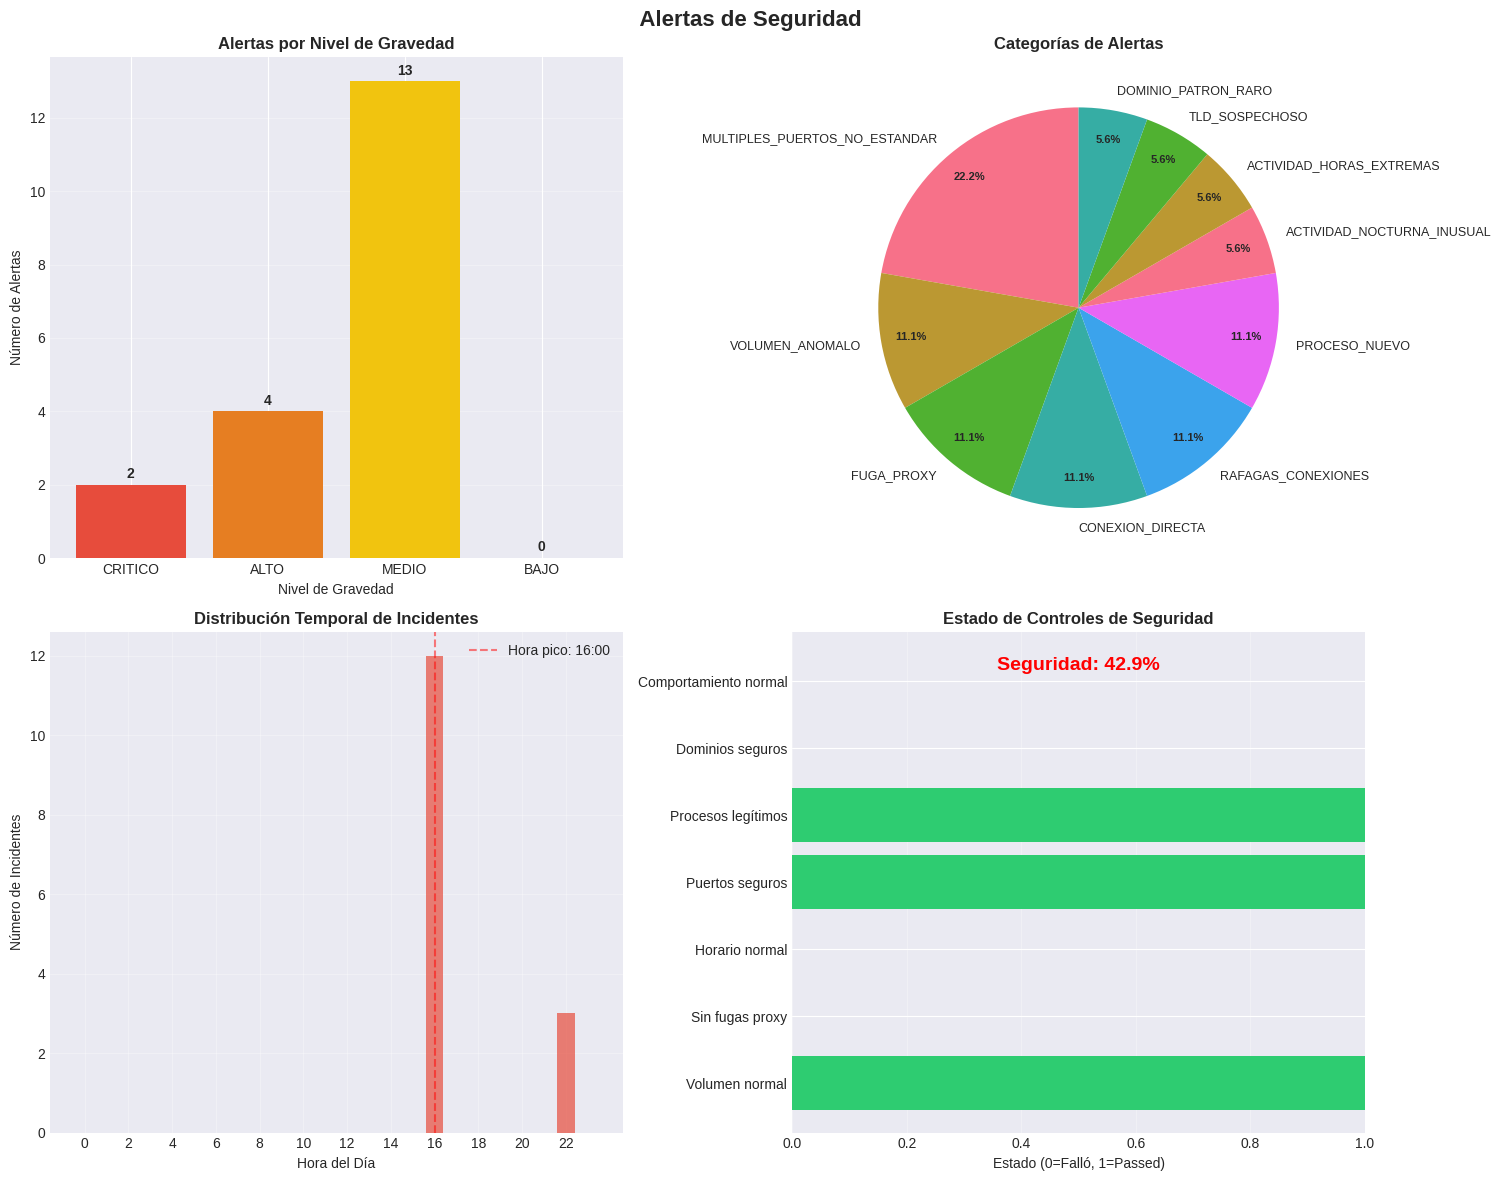


  RESUMEN DE SEGURIDAD DEL SISTEMA
   • Porcentaje de seguridad: 42.9%
   • Controles aprobados: 3/7
   • Nivel de riesgo: ALTO 

   RECOMENDACIONES PRIORITARIAS:
   • Bloquear IPs sospechosas temporalmente y revisar logs de firewall
   • Bloquear IPs sospechosas temporalmente y revisar logs de firewall
   • Revisar configuración de proxy en estaciones de trabajo y bloquear tráfico directo


In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
if alertas:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('  Alertas de Seguridad', fontsize=16, fontweight='bold')

    # 1. Gráfico de barras por nivel
    ax1 = axes[0, 0]
    niveles_orden = ['CRITICO', 'ALTO', 'MEDIO', 'BAJO']
    valores_niveles = [niveles.get(n, 0) for n in niveles_orden]

    colors_niveles = {'CRITICO': '#e74c3c', 'ALTO': '#e67e22', 'MEDIO': '#f1c40f', 'BAJO': '#2ecc71'}
    bar_colors = [colors_niveles.get(n, '#95a5a6') for n in niveles_orden]

    bars1 = ax1.bar(niveles_orden, valores_niveles, color=bar_colors)
    ax1.set_xlabel('Nivel de Gravedad')
    ax1.set_ylabel('Número de Alertas')
    ax1.set_title('Alertas por Nivel de Gravedad', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='y')

    # Añadir valores en las barras
    for bar, valor in zip(bars1, valores_niveles):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{valor}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # 2. Gráfico de pastel por categoría (top 10)
    ax2 = axes[0, 1]
    top_categorias = sorted(categorias.items(), key=lambda x: x[1], reverse=True)[:10]
    categorias_labels = [cat for cat, _ in top_categorias]
    categorias_values = [val for _, val in top_categorias]

    if sum(categorias_values) > 0:
        wedges, texts, autotexts = ax2.pie(categorias_values,
                                          labels=categorias_labels,
                                          autopct='%1.1f%%',
                                          startangle=90,
                                          pctdistance=0.85)

        for text in texts:
            text.set_fontsize(9)
        for autotext in autotexts:
            autotext.set_fontsize(8)
            autotext.set_fontweight('bold')

        ax2.set_title('Categorías de Alertas', fontsize=12, fontweight='bold')

    # 3. Heatmap de alertas por hora
    ax3 = axes[1, 0]

    # Extraer hora de cada alerta (si tiene timestamp)
    horas_alertas = []
    for alerta in alertas:
        if 'evidencia' in alerta and isinstance(alerta['evidencia'], list):
            for ev in alerta['evidencia']:
                if isinstance(ev, dict) and 'timestamp' in ev:
                    try:
                        ts = ev['timestamp']
                        if isinstance(ts, str) and ':' in ts:
                            hora = int(ts.split(':')[0].split()[-1])
                            horas_alertas.append(hora)
                    except:
                        pass

    if horas_alertas:
        hist, bins = np.histogram(horas_alertas, bins=24, range=(0, 24))

        bars3 = ax3.bar(bins[:-1], hist, width=0.8, color='#e74c3c', alpha=0.7)
        ax3.set_xlabel('Hora del Día')
        ax3.set_ylabel('Número de Incidentes')
        ax3.set_title('Distribución Temporal de Incidentes', fontsize=12, fontweight='bold')
        ax3.set_xticks(range(0, 24, 2))
        ax3.grid(True, alpha=0.3)

        # Resaltar horas pico
        if len(hist) > 0:
            hora_pico = bins[np.argmax(hist)]
            ax3.axvline(x=hora_pico, color='red', linestyle='--', alpha=0.5,
                       label=f'Hora pico: {int(hora_pico):02d}:00')
            ax3.legend()
    else:
        ax3.text(0.5, 0.5, 'No hay datos temporales\nde alertas disponibles',
                transform=ax3.transAxes, ha='center', va='center', fontsize=12, color='gray')
        ax3.set_title('Distribución Temporal de Incidentes', fontsize=12, fontweight='bold')

    # 4. Métricas de seguridad
    ax4 = axes[1, 1]

    # Calcular porcentajes de seguridad
    total_checks = 7  # Número de tipos de detección
    checks_passed = 0

    # Verificar qué detecciones no encontraron problemas
    checks_status = [
        ("Volumen normal", 'conexiones_por_segundo' not in str(alertas)),
        ("Sin fugas proxy", 'FUGA_PROXY' not in str(alertas)),
        ("Horario normal", 'ACTIVIDAD_NOCTURNA' not in str(alertas)),
        ("Puertos seguros", 'PUERTOS_SOSPECHOSOS' not in str(alertas)),
        ("Procesos legítimos", 'PROCESO_SOSPECHOSO' not in str(alertas)),
        ("Dominios seguros", 'TLD_SOSPECHOSO' not in str(alertas)),
        ("Comportamiento normal", 'PROCESO_MULTI_DESTINO' not in str(alertas))
    ]

    checks_labels = [check[0] for check in checks_status]
    checks_values = [1 if check[1] else 0 for check in checks_status]
    checks_passed = sum(checks_values)

    # Gráfico de barras horizontales
    y_pos = np.arange(len(checks_labels))
    colors_check = ['#2ecc71' if v else '#e74c3c' for v in checks_values]

    bars4 = ax4.barh(y_pos, checks_values, color=colors_check)
    ax4.set_yticks(y_pos)
    ax4.set_yticklabels(checks_labels)
    ax4.set_xlim([0, 1])
    ax4.set_xlabel('Estado (0=Falló, 1=Passed)')
    ax4.set_title('Estado de Controles de Seguridad', fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='x')

    # Añadir porcentaje
    porcentaje_seguridad = (checks_passed / total_checks) * 100
    ax4.text(0.5, 0.95, f'Seguridad: {porcentaje_seguridad:.1f}%',
            transform=ax4.transAxes, ha='center', va='top',
            fontsize=14, fontweight='bold',
            color='green' if porcentaje_seguridad > 80 else 'orange' if porcentaje_seguridad > 60 else 'red')

    plt.tight_layout()
    plt.show()

    # Mostrar resumen de seguridad
    print(f"\n" + "=" * 70)
    print("  RESUMEN DE SEGURIDAD DEL SISTEMA")
    print("=" * 70)
    print(f"   • Porcentaje de seguridad: {porcentaje_seguridad:.1f}%")
    print(f"   • Controles aprobados: {checks_passed}/{total_checks}")
    print(f"   • Nivel de riesgo: ", end="")

    if porcentaje_seguridad >= 80:
        print("BAJO ")
    elif porcentaje_seguridad >= 60:
        print("MODERADO ")
    else:
        print("ALTO ")

    print(f"\n   RECOMENDACIONES PRIORITARIAS:")

    # Priorizar recomendaciones
    recomendaciones_prioritarias = []
    for alerta in [a for a in alertas if a['nivel'] in ['CRITICO', 'ALTO']][:3]:
        recomendaciones_prioritarias.append(f"   • {alerta['recomendacion']}")

    if recomendaciones_prioritarias:
        for rec in recomendaciones_prioritarias:
            print(rec)
    else:
        print("   • Mantener políticas actuales de seguridad")
        print("   • Continuar monitoreo proactivo")
        print("   • Revisar actualizaciones de reglas de firewall")
else:
    # Si no hay alertas, mostrar dashboard positivo
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.text(0.5, 0.6, '✅ SISTEMA SEGURO',
            transform=ax.transAxes, ha='center', va='center',
            fontsize=24, fontweight='bold', color='green')

    ax.text(0.5, 0.4, 'No se detectaron anomalías de seguridad',
            transform=ax.transAxes, ha='center', va='center',
            fontsize=14, color='darkgreen')

    ax.text(0.5, 0.3, f'Análisis completado: {datetime.now().strftime("%Y-%m-%d %H:%M")}',
            transform=ax.transAxes, ha='center', va='center',
            fontsize=10, color='gray')

    ax.set_title('Dashboard de Seguridad - Estado Óptimo', fontsize=16, fontweight='bold')
    ax.axis('off')

    plt.show()